In [149]:
import pandas as pd
import requests
import random
from time import sleep
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import nltk
import os
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import datetime
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import learning_curve
import matplotlib.style as style

%matplotlib inline
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [150]:
df = pd.read_pickle("Data/Fitbit_and_MFP_Cleaned.pkl")

df.reset_index(inplace=True)

df.head(50)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Fiber_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Vitamin_A_Dinner,Vitamin_C_Dinner,Calcium_Dinner,Iron_Dinner,Weight,Net_Calories,Day_of_week
0,2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,NaN,NaN,Friday
1,2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,NaN,NaN,Saturday
2,2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,...,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,NaN,-1110.2,Sunday
3,2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,...,10.000000,15.000000,5.000000,40.000000,125.000000,10.000000,10.000000,186.800000,-660.1,Monday
4,2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,...,1.900000,14.100000,47.700000,18.000000,48.800000,2.500000,25.400000,186.483333,-154.3,Tuesday
5,2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,...,4.378022,8.345055,42.856044,11.289011,16.280220,11.697802,21.106593,186.166667,-978.3,Wednesday
6,2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,...,4.000000,6.942857,31.000000,9.000000,12.935065,24.000000,23.000000,185.850000,-142.5,Thursday
7,2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,185.533333,-1036.9,Friday
8,2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,185.216667,-903.0,Saturday
9,2016-12-25,1178.000000,0.882320,2074.0,3.000000,9.000000,268.000000,1368.0,72.000000,12.157303,...,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,184.900000,NaN,Sunday


In [151]:
## INTERPOLATING WEIGHTS THAT ARE MISSING

df.Weight = df.Weight.interpolate(method='linear')
df.drop('Day_of_week', axis=1, inplace=True)

df.head(50)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Carbohydrates_(g)_Dinner,Fiber_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Vitamin_A_Dinner,Vitamin_C_Dinner,Calcium_Dinner,Iron_Dinner,Weight,Net_Calories
0,2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,52.296429,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,NaN,NaN
1,2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,59.961765,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,NaN,NaN
2,2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,...,71.923256,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,NaN,-1110.2
3,2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,...,30.000000,10.000000,15.000000,5.000000,40.000000,125.000000,10.000000,10.000000,186.800000,-660.1
4,2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,...,44.000000,1.900000,14.100000,47.700000,18.000000,48.800000,2.500000,25.400000,186.483333,-154.3
5,2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,...,56.232967,4.378022,8.345055,42.856044,11.289011,16.280220,11.697802,21.106593,186.166667,-978.3
6,2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,...,72.000000,4.000000,6.942857,31.000000,9.000000,12.935065,24.000000,23.000000,185.850000,-142.5
7,2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,52.296429,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,185.533333,-1036.9
8,2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,59.961765,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,185.216667,-903.0
9,2016-12-25,1178.000000,0.882320,2074.0,3.000000,9.000000,268.000000,1368.0,72.000000,12.157303,...,71.923256,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,184.900000,NaN


In [152]:
#sns.pairplot(df)

In [153]:
df.corr()

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Carbohydrates_(g)_Dinner,Fiber_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Vitamin_A_Dinner,Vitamin_C_Dinner,Calcium_Dinner,Iron_Dinner,Weight,Net_Calories
Steps,1.000000,0.995766,0.819990,0.558649,0.558907,0.813502,-0.289497,0.450569,0.550001,0.682267,...,-0.077543,-0.023374,0.009917,0.021561,-0.084366,-0.121817,-0.038628,-0.055785,-0.069500,-0.521386
Distance,0.995766,1.000000,0.818133,0.559068,0.559315,0.812858,-0.292332,0.441155,0.537661,0.684028,...,-0.077531,-0.015520,0.008104,0.019098,-0.083238,-0.123088,-0.036822,-0.054140,-0.070768,-0.515065
Calories_Burned,0.819990,0.818133,1.000000,0.420462,0.420316,0.840080,-0.446800,0.513868,0.617855,0.649211,...,-0.048653,-0.008628,0.015949,0.027685,-0.072289,-0.122105,0.033869,-0.036147,-0.076714,-0.630445
Floors,0.558649,0.559068,0.420462,1.000000,0.999978,0.380661,-0.141470,0.023356,0.389413,0.473739,...,-0.011740,0.008957,0.040277,0.008717,0.023391,-0.008109,-0.005854,-0.020225,-0.117776,-0.334658
Elevation,0.558907,0.559315,0.420316,0.999978,1.000000,0.381010,-0.141999,0.023214,0.389972,0.474827,...,-0.011831,0.008609,0.040031,0.008626,0.023244,-0.008071,-0.005512,-0.020054,-0.117034,-0.334752
Activity_Calories,0.813502,0.812858,0.840080,0.380661,0.381010,1.000000,-0.417237,0.655377,0.691904,0.723201,...,-0.067787,-0.037258,0.039499,0.035555,-0.100927,-0.122557,0.017910,-0.051542,-0.034890,-0.554576
Minutes_Sedentary,-0.289497,-0.292332,-0.446800,-0.141470,-0.141999,-0.417237,1.000000,-0.419968,-0.246551,-0.258056,...,0.001566,-0.019875,0.014968,-0.061860,-0.052856,0.000276,-0.058196,-0.004051,0.073978,0.180511
Minutes_Lightly_Active,0.450569,0.441155,0.513868,0.023356,0.023214,0.655377,-0.419968,1.000000,0.116349,0.021973,...,-0.153357,-0.026581,-0.049650,0.053892,-0.143834,-0.182727,-0.040927,-0.058355,0.011869,-0.292117
Minutes_Fairly_Active,0.550001,0.537661,0.617855,0.389413,0.389972,0.691904,-0.246551,0.116349,1.000000,0.784520,...,0.060643,-0.036842,0.129766,-0.006320,0.001863,-0.002027,0.089757,-0.001412,-0.070196,-0.360356
Minutes_Very_Active,0.682267,0.684028,0.649211,0.473739,0.474827,0.723201,-0.258056,0.021973,0.784520,1.000000,...,0.042467,-0.007969,0.092838,0.009171,0.009864,0.003345,0.060268,0.014969,-0.022122,-0.421443


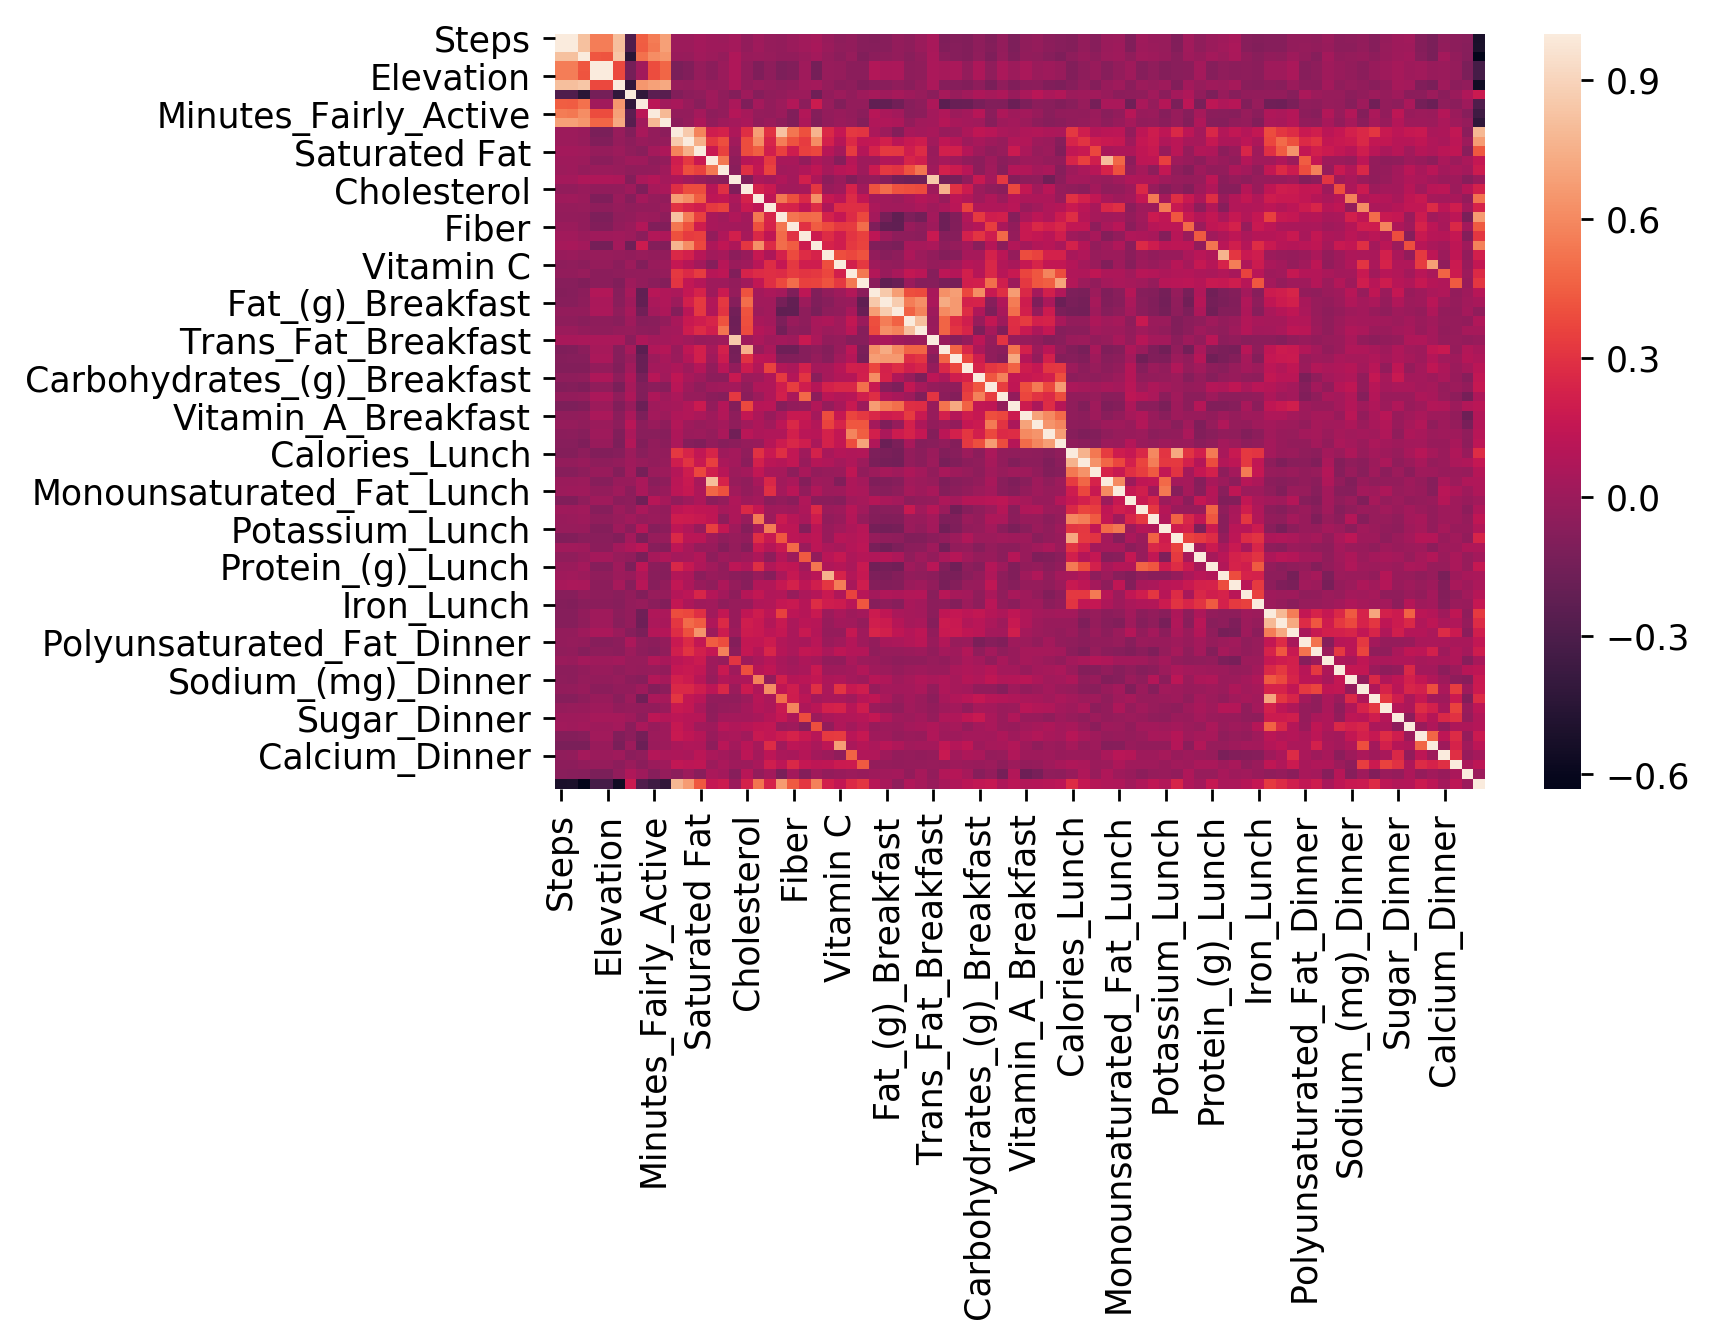

In [154]:
plt.figure(dpi=250)
sns.heatmap(df.corr())

Text(0.5,1,'Time Series of Weight')

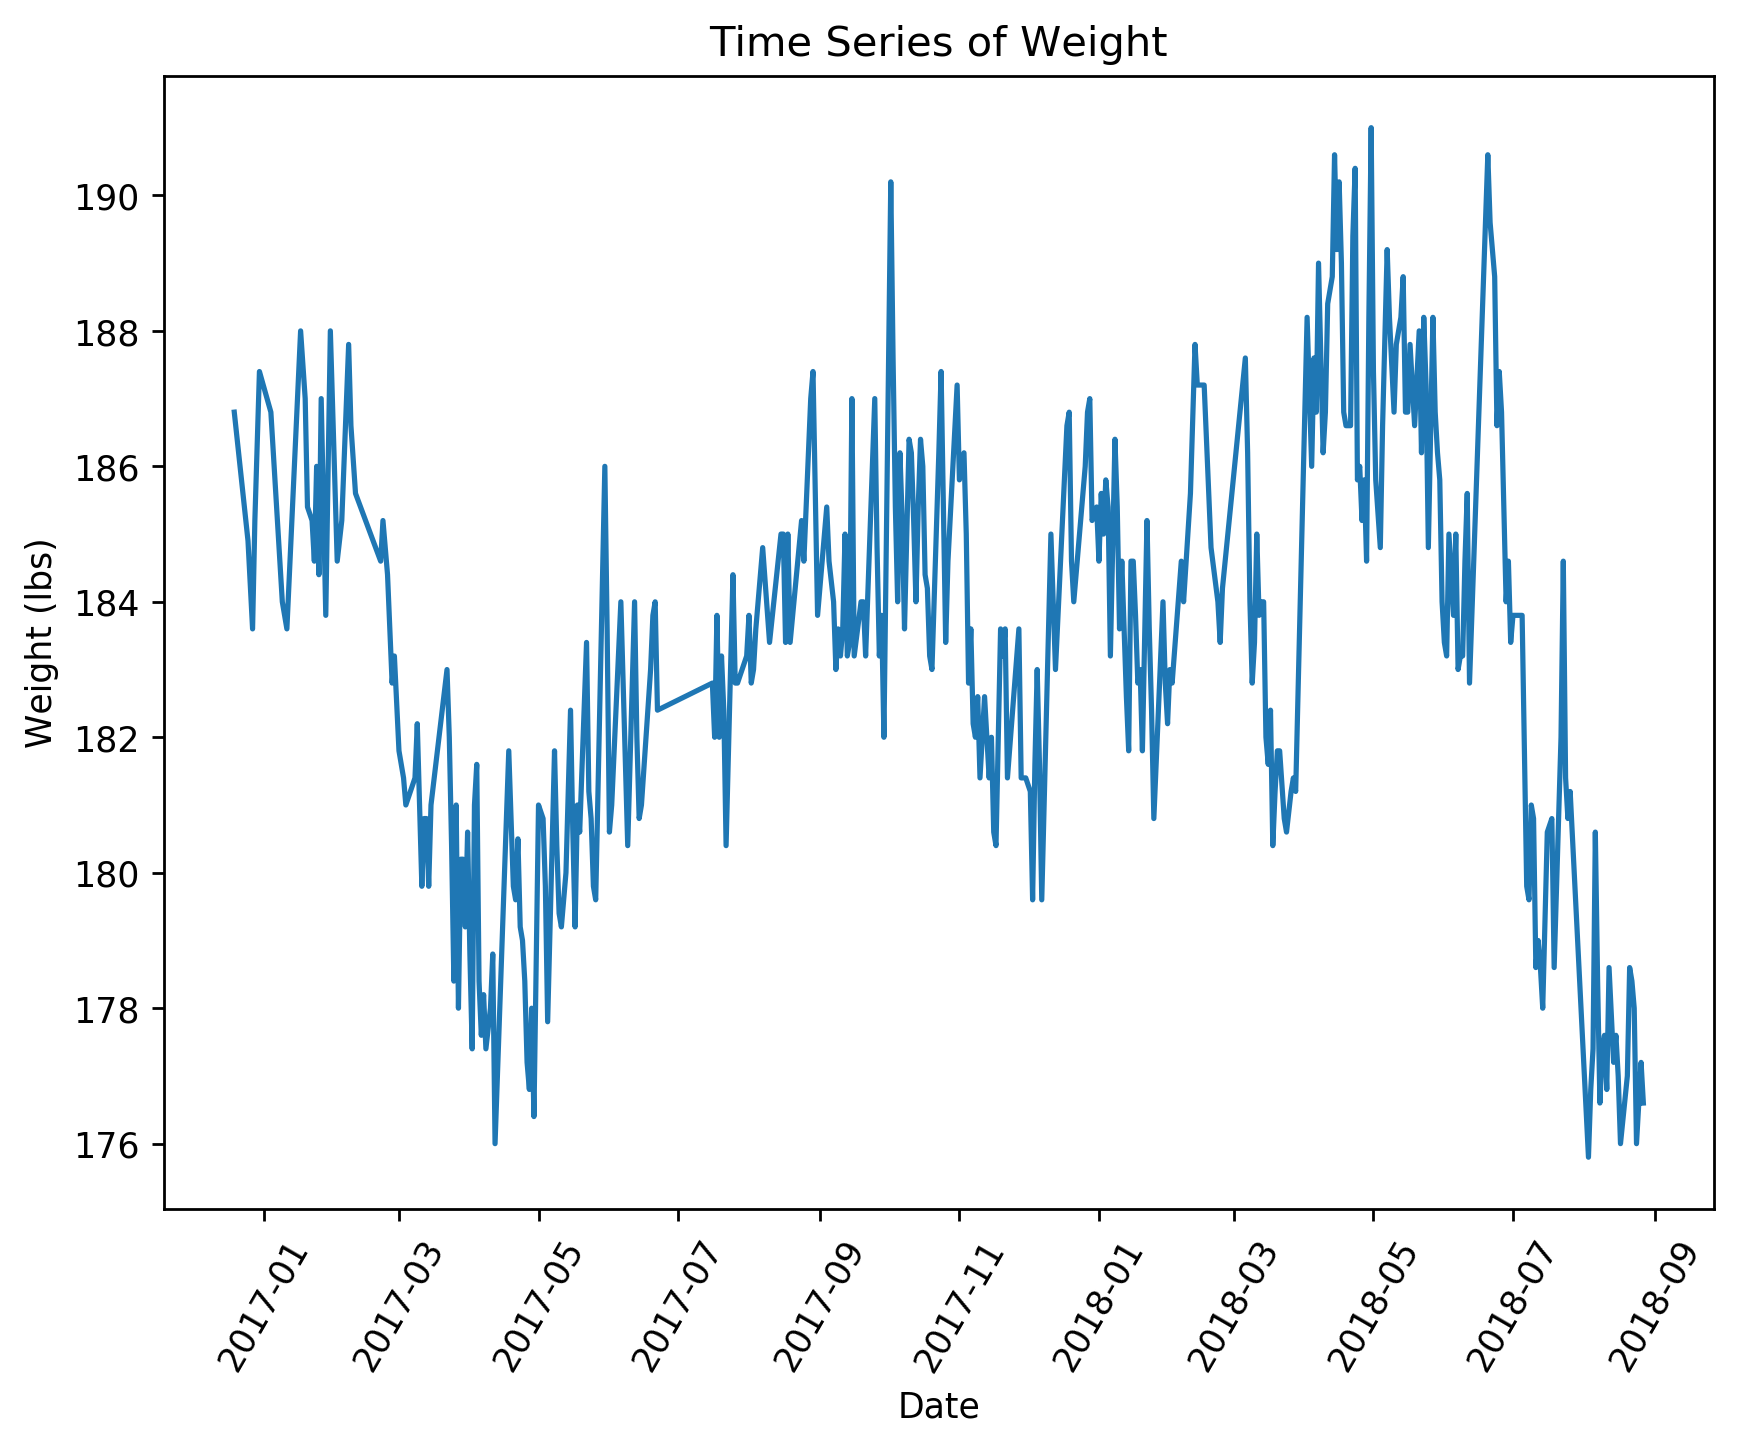

In [155]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=250, facecolor='w', edgecolor='k');

plt.plot(df.Date, df.Weight);


plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.title('Time Series of Weight')

Text(0.5,1,'Time Series of Calorie Intake')

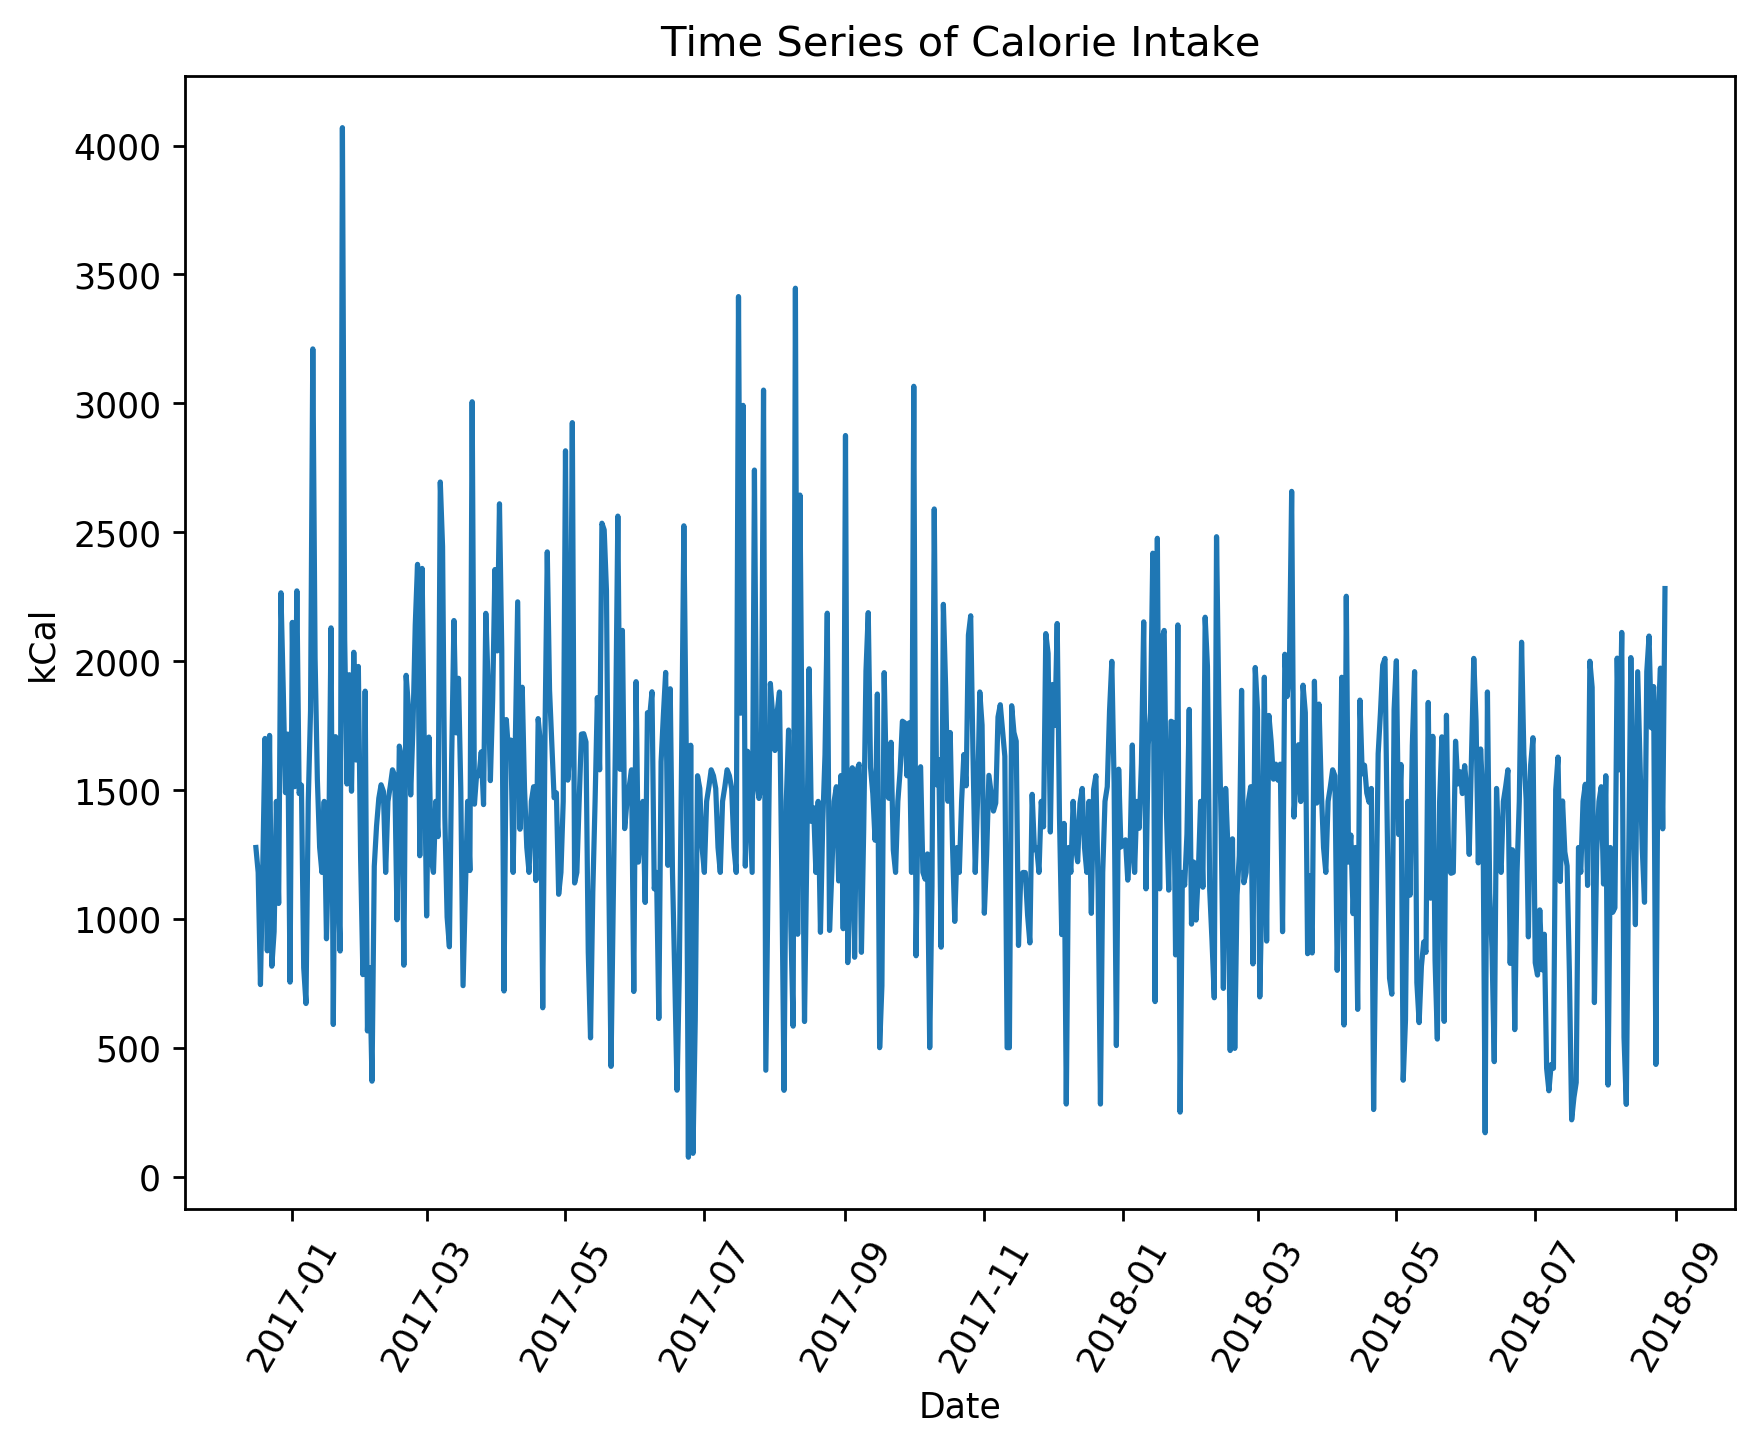

In [156]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=250, facecolor='w', edgecolor='k');

plt.plot(df.Date, df.Calories);


plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('kCal')
plt.title('Time Series of Calorie Intake')

In [157]:
df["Calories_MA30"] = df.Calories.rolling(window=30).mean()
df["Weight_MA30"] = df.Weight.rolling(window=30).mean()
df["Weight_MA7"] = df.Weight.rolling(window=7).mean()

df.head(20)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Protein_(g)_Dinner,Vitamin_A_Dinner,Vitamin_C_Dinner,Calcium_Dinner,Iron_Dinner,Weight,Net_Calories,Calories_MA30,Weight_MA30,Weight_MA7
0,2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,39.676786,9.469643,16.176786,9.782143,11.300000,NaN,NaN,NaN,NaN,NaN
1,2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,42.591176,13.979412,20.058824,25.000000,24.091176,NaN,NaN,NaN,NaN,NaN
2,2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,...,45.627907,17.386047,54.534884,10.860465,23.369767,NaN,-1110.2,NaN,NaN,NaN
3,2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,...,5.000000,40.000000,125.000000,10.000000,10.000000,186.800000,-660.1,NaN,NaN,NaN
4,2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,...,47.700000,18.000000,48.800000,2.500000,25.400000,186.483333,-154.3,NaN,NaN,NaN
5,2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,...,42.856044,11.289011,16.280220,11.697802,21.106593,186.166667,-978.3,NaN,NaN,NaN
6,2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,...,31.000000,9.000000,12.935065,24.000000,23.000000,185.850000,-142.5,NaN,NaN,NaN
7,2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,39.676786,9.469643,16.176786,9.782143,11.300000,185.533333,-1036.9,NaN,NaN,NaN
8,2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,42.591176,13.979412,20.058824,25.000000,24.091176,185.216667,-903.0,NaN,NaN,NaN
9,2016-12-25,1178.000000,0.882320,2074.0,3.000000,9.000000,268.000000,1368.0,72.000000,12.157303,...,45.627907,17.386047,54.534884,10.860465,23.369767,184.900000,NaN,NaN,NaN,185.850000


Text(0.5,1,'Time Series of Weight (30 Day RWindow)')

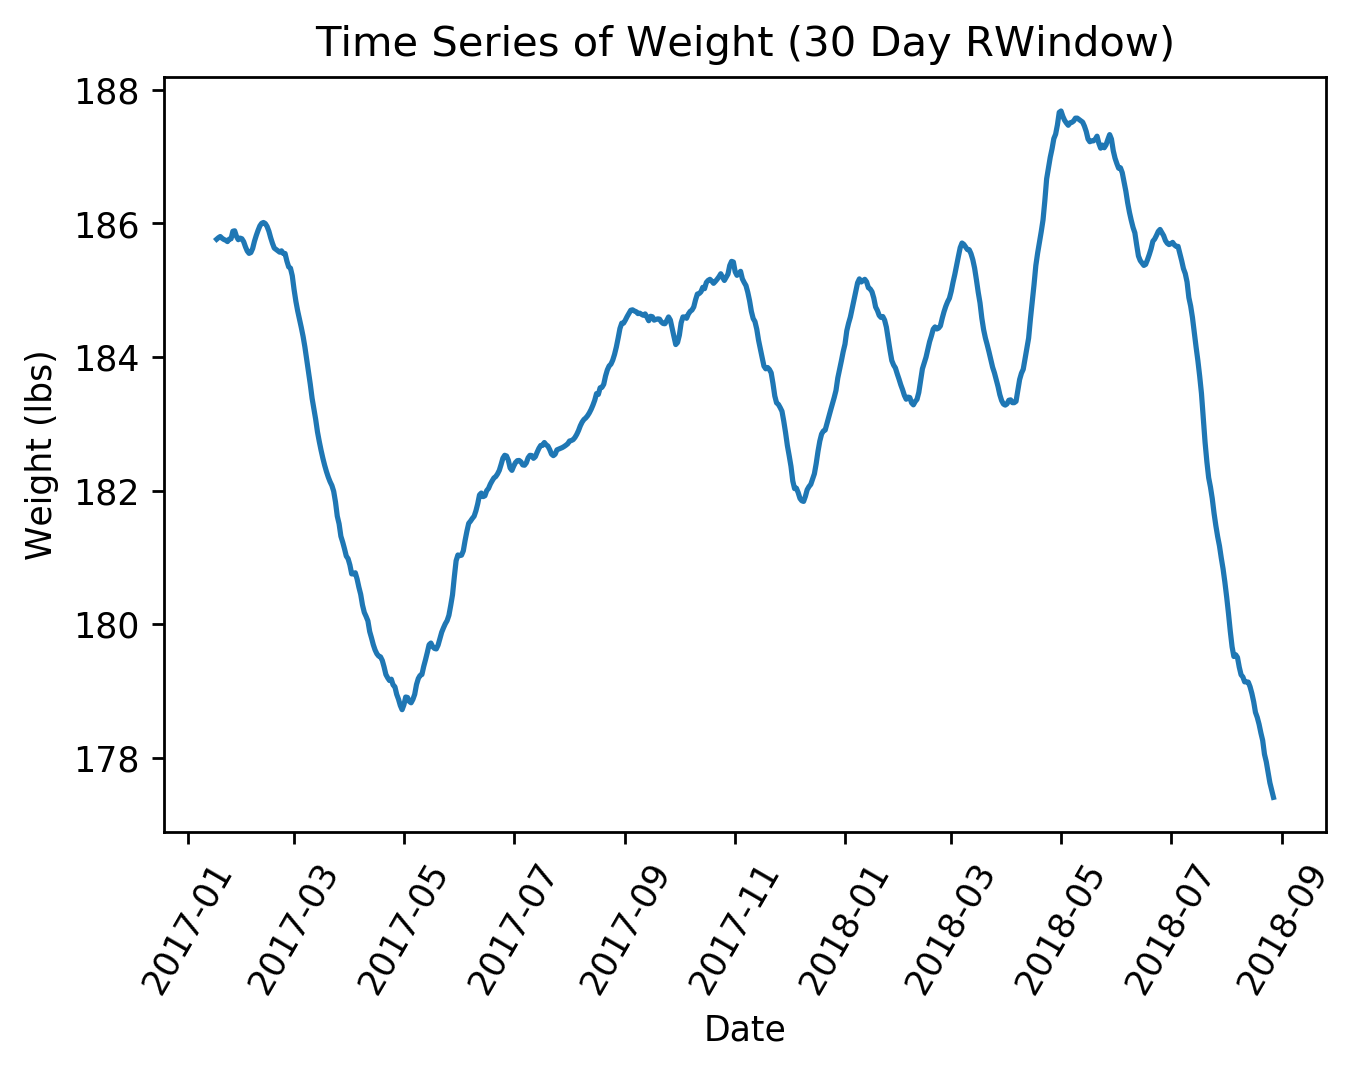

In [158]:
df.set_index('Date', inplace=True)

plt.figure(dpi=250)
plt.plot(df["Weight_MA30"])
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.title('Time Series of Weight (30 Day RWindow)')

<Figure size 1500x1000 with 0 Axes>

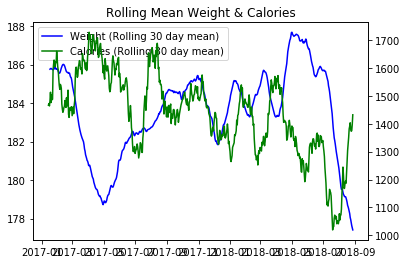

In [159]:
plt.figure(dpi=250)

fig, ax = plt.subplots(1, 1)
ax2 = ax.twinx()
orig = ax.plot(df["Weight_MA30"], color='blue',label='Weight (Rolling 30 day mean)')
std = ax2.plot(df["Calories_MA30"], color='green', label = 'Calories (Rolling 30 day mean)')


lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [line.get_label() for line in lines], loc='upper left')

plt.draw()
plt.xticks(rotation=60)
plt.title('Rolling Mean Weight & Calories')
plt.show(block=False)

Text(0.5,1,'Time Series of Calories (30 Day RWindow)')

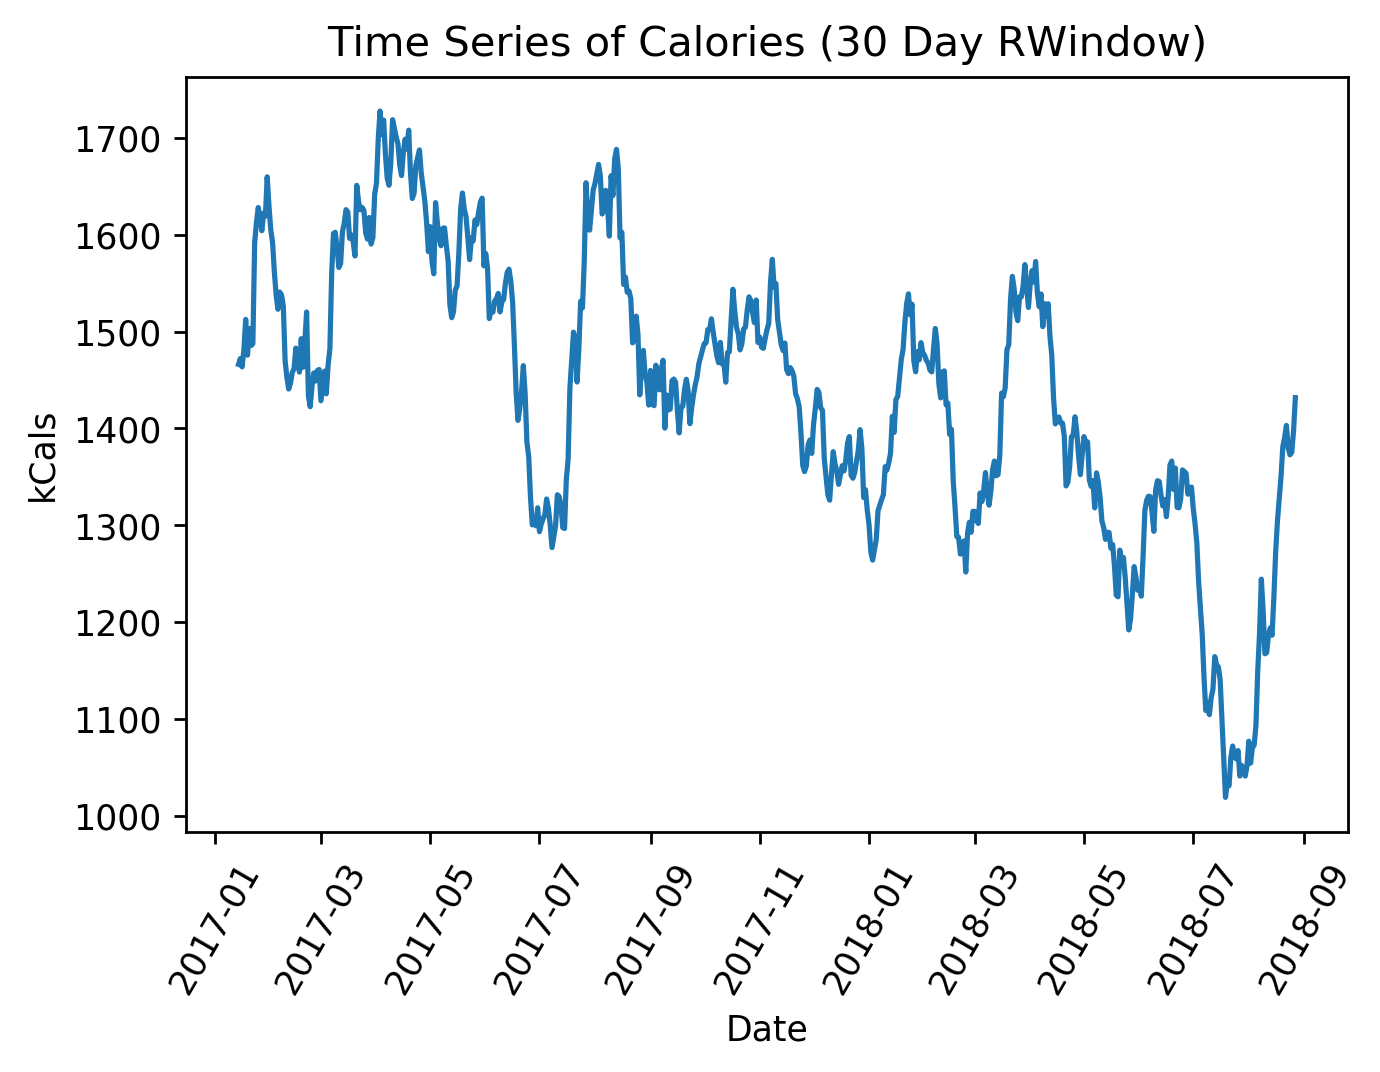

In [160]:
plt.figure(dpi=250)
plt.plot(df["Calories_MA30"])
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('kCals')
plt.title('Time Series of Calories (30 Day RWindow)')

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor

df['diff_weight'] = df['Weight'].diff()

df['diff_weight_lag1'] = df['diff_weight'].shift(1)
df['diff_weight_weekly_lag'] = df['diff_weight'].shift(7)

df['diff_weight_MA_30'] = df['diff_weight_lag1'].rolling(30, center=True).median()
df['diff_weight_MA_7'] = df['diff_weight_lag1'].rolling(7, center=True).median()
df['diff_weight_MA_1'] = df['diff_weight_lag1'].rolling(2, center=True).median()

df.head(20)

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,Net_Calories,Calories_MA30,Weight_MA30,Weight_MA7,diff_weight,diff_weight_lag1,diff_weight_weekly_lag,diff_weight_MA_30,diff_weight_MA_7,diff_weight_MA_1
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,16.202247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,23.292135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,24.078652,...,-1110.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,23.853933,...,-660.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,17.397727,...,-154.3,NaN,NaN,NaN,-0.316667,NaN,NaN,NaN,NaN,NaN
2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,14.261364,...,-978.3,NaN,NaN,NaN,-0.316667,-0.316667,NaN,NaN,NaN,NaN
2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,14.215909,...,-142.5,NaN,NaN,NaN,-0.316667,-0.316667,NaN,NaN,NaN,-0.316667
2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,16.202247,...,-1036.9,NaN,NaN,NaN,-0.316667,-0.316667,NaN,NaN,NaN,-0.316667
2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,23.292135,...,-903.0,NaN,NaN,NaN,-0.316667,-0.316667,NaN,NaN,-0.316667,-0.316667


(array([736361., 736420., 736481., 736542., 736603., 736664., 736726.,
        736785., 736846., 736907.]), <a list of 10 Text xticklabel objects>)

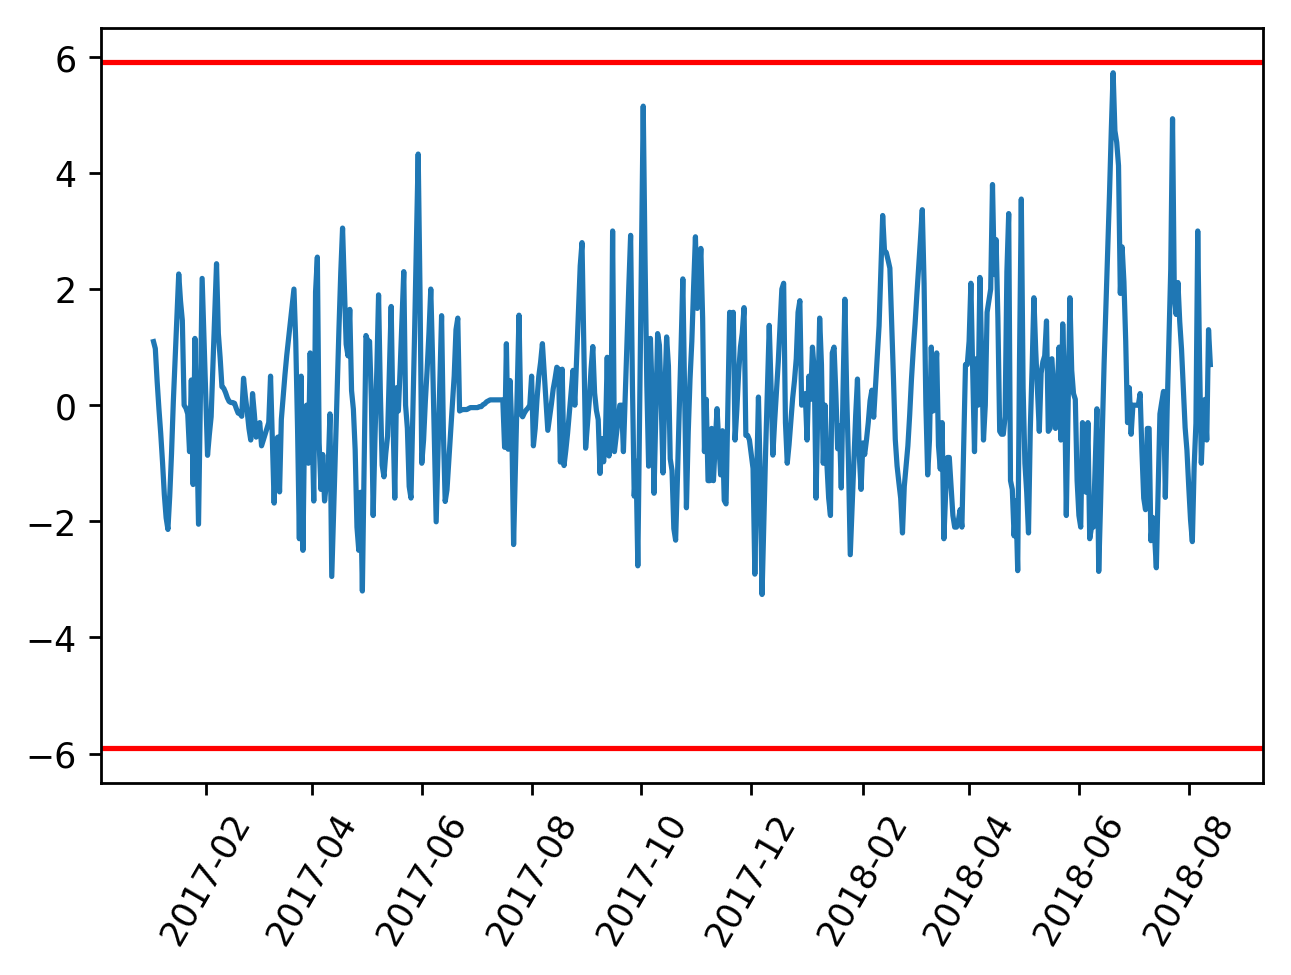

In [162]:
df['Median_Weight'] = df['Weight'].rolling(30, center=True).median()
df['Std_Weight'] = df['Weight'].rolling(30, center=True).std()
std_dev = df['Weight'].std()

df['residual'] = df['Weight'] - df['Median_Weight']

plt.figure(dpi=250)
plt.plot(df['residual'])
plt.gca().axhline(2*std_dev, c='r')
plt.gca().axhline(-2*std_dev, c='r')
plt.xticks(rotation=60)

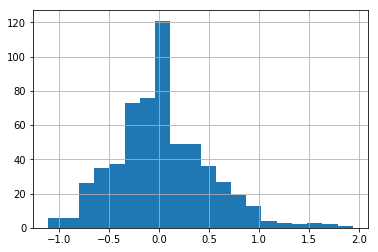

In [163]:
df['z'] = df['residual'] / std_dev
df['z'].hist(bins=20);

In [164]:
print('0 diffs:', df['Weight'].std())
print('1 diffs:', df['Weight'].diff().std())
print('2 diffs:', df['Weight'].diff().diff().std())
print('3 diffs:', df['Weight'].diff().diff().diff().std())

0 diffs: 2.95515957446908
1 diffs: 1.160816534567066
2 diffs: 1.658913357728994
3 diffs: 2.7829457480930295


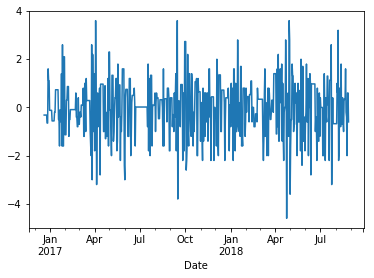

In [165]:
# Plot diff of weight over time
df.Weight.diff().plot();

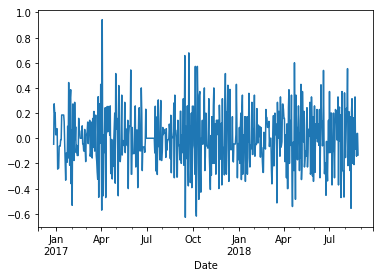

In [166]:
# Plot diff of weight over time
df.Weight_MA7.diff().diff().plot();

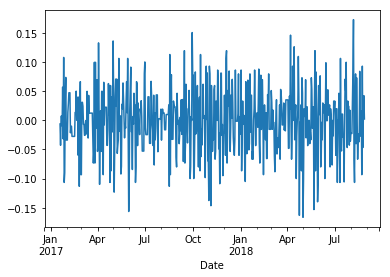

In [167]:
# Plot diff of weight over time
df.Weight_MA30.diff().diff().plot();

In [168]:
print(len(df))
print(df.Weight[:150].mean())
print(df.Weight[150:300].mean())
print(df.Weight[300:450].mean())
print(df.Weight[450:].mean())

620
182.66122448979598
183.4406666666667
184.13199999999998
183.6111764705881


In [169]:
df[['Weight', 'diff_weight', 'diff_weight_lag1']]

,Weight,diff_weight,diff_weight_lag1
Date,,,
2016-12-16,NaN,NaN,NaN
2016-12-17,NaN,NaN,NaN
2016-12-18,NaN,NaN,NaN
2016-12-19,186.800000,NaN,NaN
2016-12-20,186.483333,-0.316667,NaN
2016-12-21,186.166667,-0.316667,-0.316667
2016-12-22,185.850000,-0.316667,-0.316667
2016-12-23,185.533333,-0.316667,-0.316667
2016-12-24,185.216667,-0.316667,-0.316667


In [170]:
for i in range(2,6):
    df[f'diff_weight_lag{i}'] = df['diff_weight'].shift(i)

X = df.iloc[:,-6:]
X.head(20)

,residual,z,diff_weight_lag2,diff_weight_lag3,diff_weight_lag4,diff_weight_lag5
Date,,,,,,
2016-12-16,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-17,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-18,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-19,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-20,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-21,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-22,NaN,NaN,-0.316667,NaN,NaN,NaN
2016-12-23,NaN,NaN,-0.316667,-0.316667,NaN,NaN
2016-12-24,NaN,NaN,-0.316667,-0.316667,-0.316667,NaN


## CREATE FINAL HOLDOUT TEST SET (LASTMONTH)

In [171]:
train_df = df[:560]

holdout_df = df[560:]

In [172]:
df

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,diff_weight_MA_7,diff_weight_MA_1,Median_Weight,Std_Weight,residual,z,diff_weight_lag2,diff_weight_lag3,diff_weight_lag4,diff_weight_lag5
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,16.202247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,23.292135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,24.078652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,23.853933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,17.397727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,14.261364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,14.215909,...,NaN,-0.316667,NaN,NaN,NaN,NaN,-0.316667,NaN,NaN,NaN
2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,16.202247,...,NaN,-0.316667,NaN,NaN,NaN,NaN,-0.316667,-0.316667,NaN,NaN
2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,23.292135,...,-0.316667,-0.316667,NaN,NaN,NaN,NaN,-0.316667,-0.316667,-0.316667,NaN


In [173]:
holdout_df

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,diff_weight_MA_7,diff_weight_MA_1,Median_Weight,Std_Weight,residual,z,diff_weight_lag2,diff_weight_lag3,diff_weight_lag4,diff_weight_lag5
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-29,13390.000000,11.012180,3184.0,24.000000,73.000000,1532.000000,695.0,123.000000,10.000000,82.000000,...,-0.600000,-1.400000,184.300000,3.550446,0.300000,0.101517,-1.400000,-0.600000,0.800000,-2.200000
2018-06-30,9506.000000,7.119990,2883.0,27.000000,82.000000,1167.000000,769.0,154.000000,10.000000,44.000000,...,-0.600000,-0.400000,183.900000,3.748376,-0.500000,-0.169196,-1.400000,-1.400000,-0.600000,0.800000
2018-07-01,9657.000000,7.233090,2979.0,12.000000,36.000000,1338.000000,1226.0,107.000000,29.000000,78.000000,...,0.000000,-0.300000,183.800000,3.850207,0.000000,0.000000,0.600000,-1.400000,-1.400000,-0.600000
2018-07-02,4542.000000,3.401950,2429.0,6.000000,18.000000,690.000000,1292.0,148.000000,9.348315,23.853933,...,0.000000,-0.400000,183.800000,3.871998,0.000000,0.000000,-1.200000,0.600000,-1.400000,-1.400000
2018-07-03,3697.000000,2.769050,2434.0,6.000000,18.000000,646.000000,1309.0,122.000000,6.000000,3.000000,...,0.000000,0.200000,183.800000,3.849857,0.000000,0.000000,0.400000,-1.200000,0.600000,-1.400000
2018-07-04,9587.000000,8.163250,2852.0,21.000000,64.000000,1064.000000,860.0,78.000000,6.000000,60.000000,...,0.000000,0.000000,183.800000,3.768850,0.000000,0.000000,0.000000,0.400000,-1.200000,0.600000
2018-07-05,4082.000000,3.057410,2426.0,4.000000,12.000000,564.000000,875.0,112.000000,6.340909,14.215909,...,0.000000,0.000000,183.600000,3.682927,0.200000,0.067678,0.000000,0.000000,0.400000,-1.200000
2018-07-06,9767.000000,7.315480,3316.0,14.000000,42.000000,1530.000000,668.0,167.000000,22.000000,56.000000,...,0.000000,0.000000,182.600000,3.445202,-0.800000,-0.270713,0.000000,0.000000,0.000000,0.400000
2018-07-07,11385.000000,9.878180,2950.0,23.000000,70.000000,1088.000000,724.0,65.000000,3.000000,68.000000,...,0.000000,-1.000000,181.400000,3.204786,-1.600000,-0.541426,0.000000,0.000000,0.000000,0.000000


In [174]:
# print Sales autocorrelation for k=1,2
print(train_df.Weight.diff().autocorr(lag=1)) 
print(train_df.Weight.diff().autocorr(lag=2))
print(train_df.Weight.diff().autocorr(lag=3)) 
print(train_df.Weight.diff().autocorr(lag=4))
print(train_df.Weight.diff().autocorr(lag=5)) 
print(train_df.Weight.diff().autocorr(lag=6))
print(train_df.Weight.diff().autocorr(lag=7)) 

-0.017205399124868022
-0.21412123435300673
-0.07007800452668105
-0.1399698962204584
-0.0906071615687935
0.09743349163941696
0.13607420959047747


In [175]:
# print Sales autocorrelation for k=1,2
print(train_df.diff_weight_MA_7.autocorr(lag=1)) 
print(train_df.diff_weight_MA_7.autocorr(lag=2))
print(train_df.diff_weight_MA_7.autocorr(lag=3)) 
print(train_df.diff_weight_MA_7.autocorr(lag=4))
print(train_df.diff_weight_MA_7.autocorr(lag=5)) 
print(train_df.diff_weight_MA_7.autocorr(lag=6))
print(train_df.diff_weight_MA_7.autocorr(lag=7)) 

0.6508753329850095
0.47883201822106886
0.3912164060022358
0.2674892912687116
0.18801102153158286
0.13579937072159015
0.02635766800631179


In [176]:
# create autocorr plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # better and more arguments

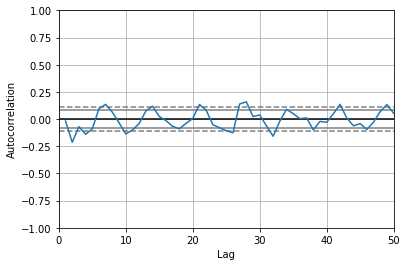

In [177]:
autocorrelation_plot(train_df.Weight.diff()[4:])
plt.xlim(0,50);
# we see corr at 12 and 24 because Sundays are all closed for store 1, so weeks are now six days long

Figure(432x288)
Figure(432x288)


<Figure size 900x600 with 0 Axes>

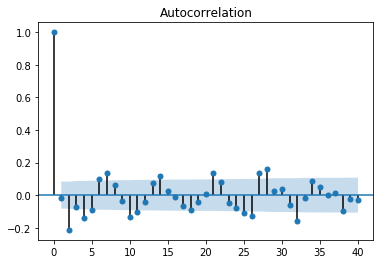

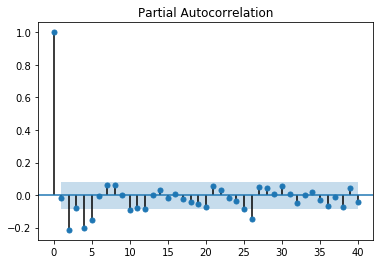

In [178]:
# create autocorr plot
# plot autocorr with statsmodel
plt.figure(dpi=150)
print(plot_acf(train_df.diff_weight.dropna(), lags=40)) # these are for non-stationary data, so we can see patterns, but generally ignore
print(plot_pacf(train_df.diff_weight.dropna(), lags=40))

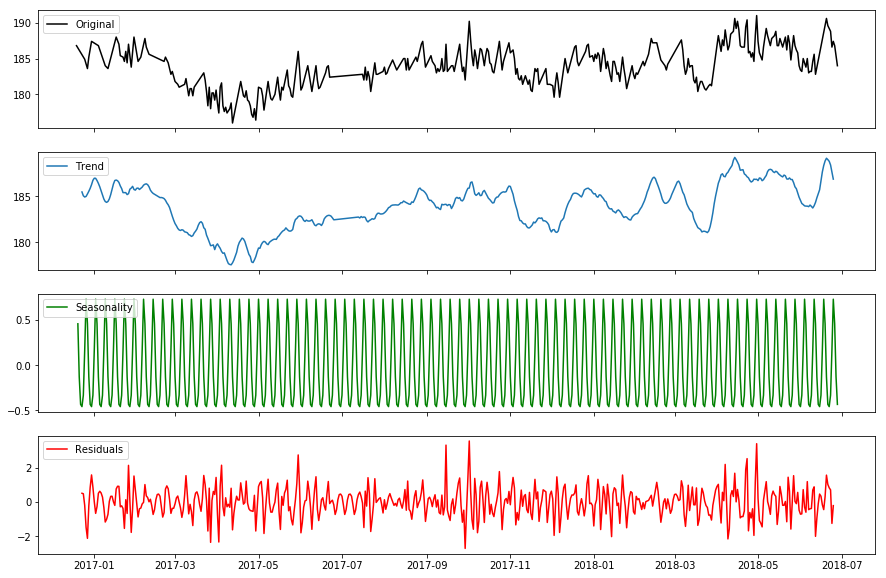

In [179]:
from  statsmodels.tsa.seasonal  import seasonal_decompose
ss_decomposition = seasonal_decompose(x=train_df.Weight[4:], 
                                      model='additive')
trend = ss_decomposition.trend
seasonal = ss_decomposition.seasonal
residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(train_df.Weight, 'k', label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residual, 'r', label='Residuals')
axes[3].legend(loc='upper left')

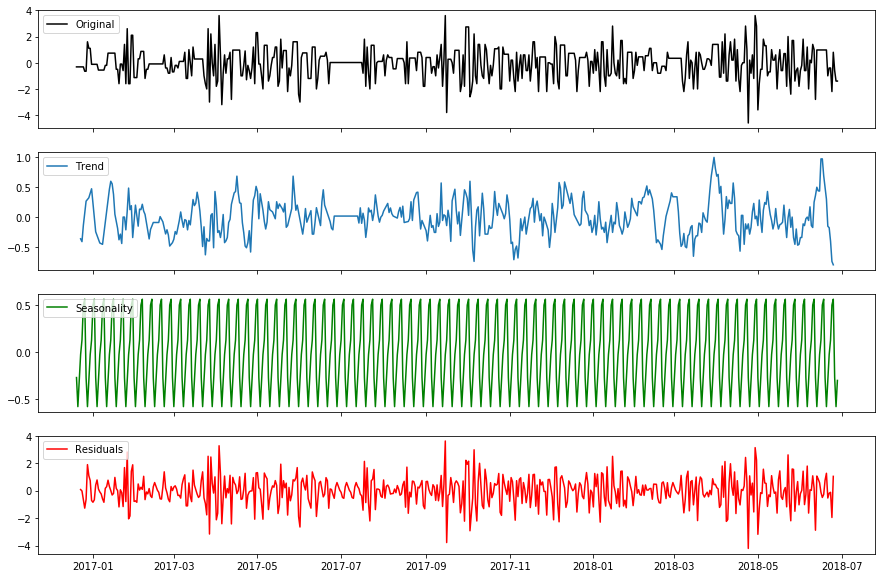

In [180]:
from  statsmodels.tsa.seasonal  import seasonal_decompose
ss_decomposition = seasonal_decompose(x=train_df.diff_weight.dropna(), 
                                      model='additive')
trend = ss_decomposition.trend
seasonal = ss_decomposition.seasonal
residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(train_df.diff_weight, 'k', label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residual, 'r', label='Residuals')
axes[3].legend(loc='upper left')

In [181]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7, center=True).mean()
    rolstd = timeseries.rolling(window=7, center=True).std()

    #Plot rolling statistics:
    plt.figure(dpi=150)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    
    plt.draw()
    plt.legend(loc='best')
    plt.xticks(rotation=60)
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    timeseries.dropna(inplace=True)
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

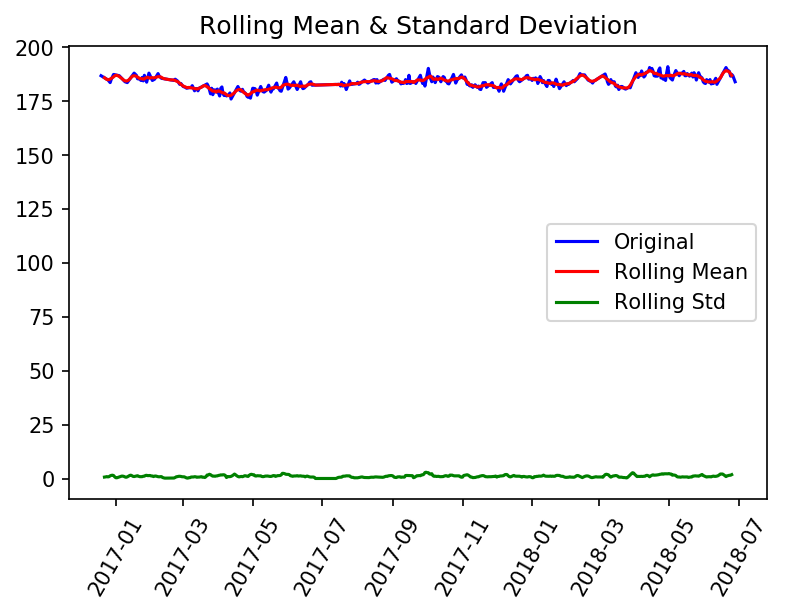

Results of Dickey-Fuller Test:
Test Statistic                  -2.594054
p-value                          0.094232
#Lags Used                      12.000000
Number of Observations Used    544.000000
Critical Value (1%)             -3.442428
Critical Value (5%)             -2.866868
Critical Value (10%)            -2.569607
dtype: float64


/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [182]:
test_stationarity(train_df.Weight)

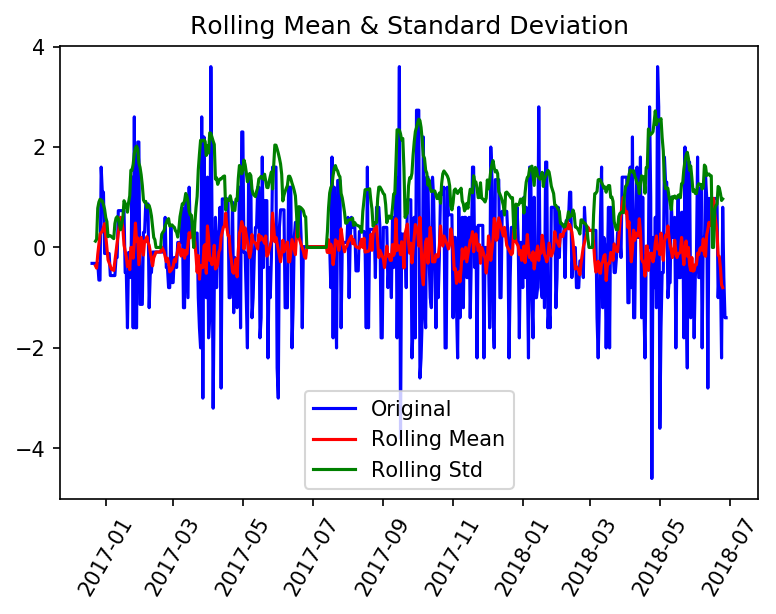

Results of Dickey-Fuller Test:
Test Statistic                -8.932097e+00
p-value                        9.752705e-15
#Lags Used                     1.100000e+01
Number of Observations Used    5.440000e+02
Critical Value (1%)           -3.442428e+00
Critical Value (5%)           -2.866868e+00
Critical Value (10%)          -2.569607e+00
dtype: float64


/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [183]:
test_stationarity(train_df.diff_weight)

In [184]:
train_df.head()

,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,...,diff_weight_MA_7,diff_weight_MA_1,Median_Weight,Std_Weight,residual,z,diff_weight_lag2,diff_weight_lag3,diff_weight_lag4,diff_weight_lag5
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,16.202247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,23.292135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,24.078652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,23.853933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,17.397727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
# df2 = df[np.isfinite(df['diff_weight'])]

In [186]:
# df2

In [187]:
# ar1 = LinearRegression()

# X = df2.iloc[1:, -1].values.reshape(-1,1)
# target= df2['diff_weight'].values[1:]
# ar1.fit(X[:], target[:])

# plt.figure(dpi=250)
# plt.plot(df2.index[1:], target, label='actual')
# plt.plot(df2.index[1:], ar1.predict(X[:]), label='predicted')
# plt.xticks(rotation=60)
# plt.xlabel('Date')
# plt.ylabel('diff_weight')
# plt.title('Time Series of Weight (1 Day RWindow)')

In [188]:
# ar1.score(X[1:], target[1:])

In [189]:
for i in range(1,6):
    train_df[f'lag{i}'] = train_df['diff_weight'].shift(i)

X = train_df.iloc[:,-7:]
X.head(20)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,diff_weight_lag4,diff_weight_lag5,lag1,lag2,lag3,lag4,lag5
Date,,,,,,,
2016-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-21,NaN,NaN,-0.316667,NaN,NaN,NaN,NaN
2016-12-22,NaN,NaN,-0.316667,-0.316667,NaN,NaN,NaN
2016-12-23,NaN,NaN,-0.316667,-0.316667,-0.316667,NaN,NaN
2016-12-24,-0.316667,NaN,-0.316667,-0.316667,-0.316667,-0.316667,NaN


In [190]:
X = X.dropna()
y = train_df.loc[X.index[:-1], 'diff_weight']
X = X[:-1]

ar7 = LinearRegression()
ar7.fit(X, y)
ar7.score(X,y)

0.1178032295608672

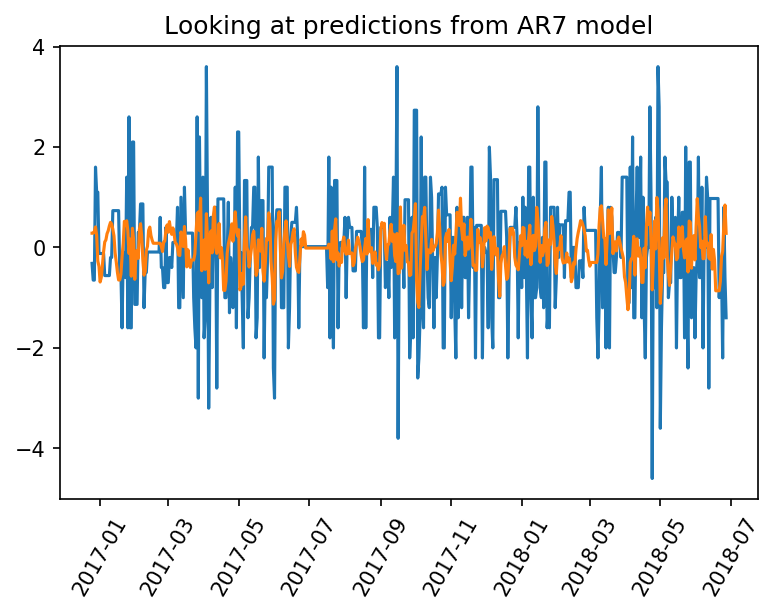

In [191]:
plt.figure(dpi=150)
plt.plot(X.index, y)
plt.plot(X.index, ar7.predict(X))
plt.title("Looking at predictions from AR7 model")
plt.xticks(rotation=60);

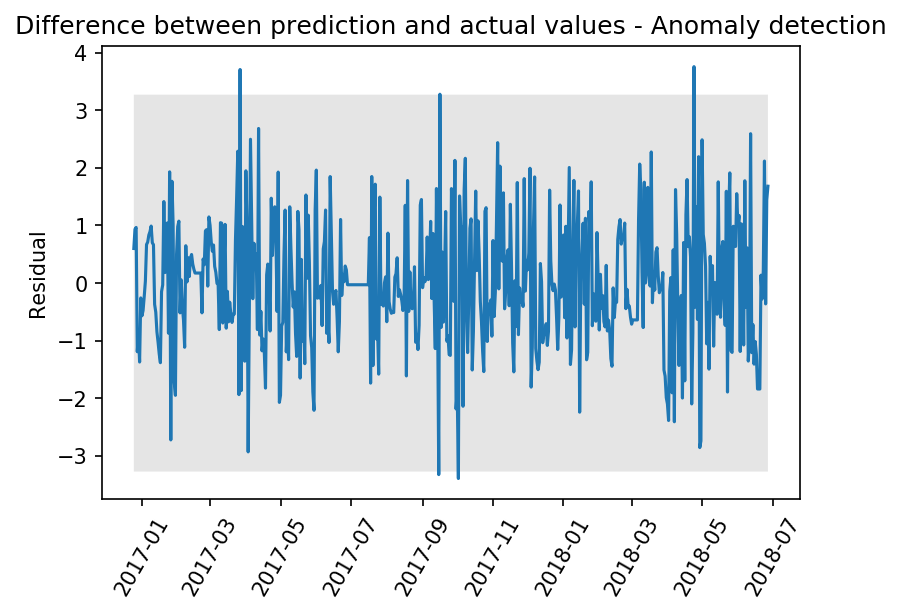

In [192]:
# Let's look at differences from the prediction:
residual = ar7.predict(X) - y
std_residual = np.std(residual)

plt.figure(dpi=150)
plt.plot(X.index, ar7.predict(X) - y)
plt.gca().fill_between(X.index, 3*std_residual, -3*std_residual, facecolor='gray', alpha=0.2)
plt.title("Difference between prediction and actual values - Anomaly detection")
plt.ylabel("Residual")
plt.xticks(rotation=60);

## POTENTIAL TO PRUNE ANOMALIES FOUND ABOVE

##### 2017-04 AND 2017-10

In [193]:
train_df['diff_weight'].values

array([        nan,         nan,         nan,         nan, -0.31666667,
       -0.31666667, -0.31666667, -0.31666667, -0.31666667, -0.31666667,
       -0.65      , -0.65      ,  1.6       ,  1.1       ,  1.1       ,
       -0.12      , -0.12      , -0.12      , -0.12      , -0.12      ,
       -0.56      , -0.56      , -0.56      , -0.56      , -0.56      ,
       -0.2       , -0.2       ,  0.73333333,  0.73333333,  0.73333333,
        0.73333333,  0.73333333,  0.73333333, -0.5       , -0.5       ,
       -1.6       , -0.1       , -0.1       , -0.6       ,  1.4       ,
       -1.6       ,  2.6       , -1.6       , -1.6       ,  2.1       ,
        2.1       , -1.13333333, -1.13333333, -1.13333333,  0.3       ,
        0.3       ,  0.86666667,  0.86666667,  0.86666667, -1.2       ,
       -0.5       , -0.5       , -0.09090909, -0.09090909, -0.09090909,
       -0.09090909, -0.09090909, -0.09090909, -0.09090909, -0.09090909,
       -0.09090909, -0.09090909, -0.09090909,  0.6       , -0.4 

In [194]:
from statsmodels.tsa.arima_model import ARMA, ARIMA

diff_weight = train_df['diff_weight'].values[8:-3]
ar7_no_ma = ARMA(diff_weight, (7,0)).fit()
ar7_no_ma.summary()

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:                     ARMA(7, 0)   Log Likelihood                -823.703
Method:                       css-mle   S.D. of innovations              1.084
Date:                Sun, 09 Sep 2018   AIC                           1665.406
Time:                        18:35:05   BIC                           1704.179
Sample:                             0   HQIC                          1680.559
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.025      0.231      0.817      -0.044       0.055
ar.L1.y       -0.1001      0.043     -2.349      0.019      -0.184      -0.017
ar.L2.y       -0.2795      0.043     -6.511      0.000      -0.364      -0.195
ar.L3.y       -0.1330      0.044     -3.019      0.003      -0.219      -0.047
ar.L4.y       -0.2202      0.043     -5.074      0.000      -0.305      -0.135
ar.L5.y       -0.1514      0.044     -3.431      0.001      -0.238      -0.065
ar.L6.y       -0.0128      0.043     -0.298      0.766      -0.097       0.071
ar.L7.y        0.0543      0.043      1.270      0.205      -0.029       0.138
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4671           -0.7467j            1.6461           -0.4251
AR.2           -1.4671           +0.7467j            1.6461            0.4251
AR.3           -0.4179           -1.2900j            1.3560           -0.2999
AR.4           -0.4179           +1.2900j            1.3560            0.2999
AR.5            0.7751           -0.9510j            1.2268           -0.1412
AR.6            0.7751           +0.9510j            1.2268            0.1412
AR.7            2.4554           -0.0000j            2.4554           -0.0000
-----------------------------------------------------------------------------
"""

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


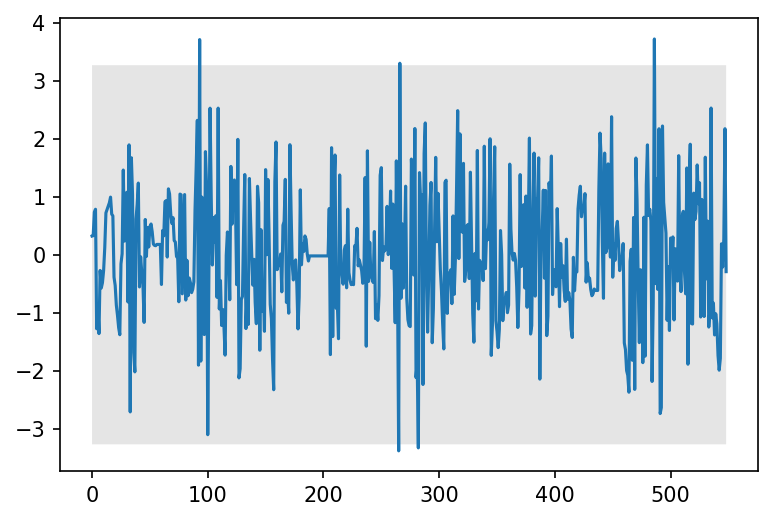

In [195]:
# plot residuals
# Same as before!
plt.figure(dpi=150)
plt.plot(-ar7_no_ma.resid)
plt.gca().fill_between(range(len(ar7_no_ma.resid)), 3*std_residual, -3*std_residual, facecolor='gray', alpha=0.2);

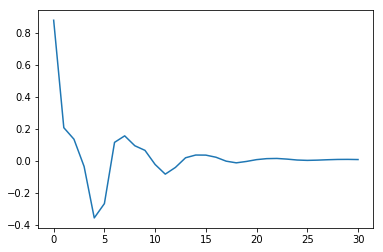

In [196]:
# forecast and plot for the next 25 periods
plt.plot(ar7_no_ma.forecast(steps=31)[0]);

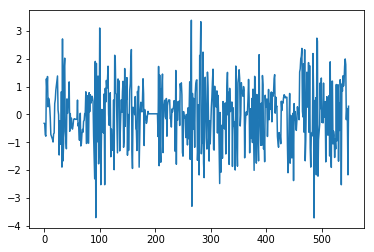

In [197]:
plt.plot(ar7_no_ma.resid);

Figure(432x288)
Figure(432x288)


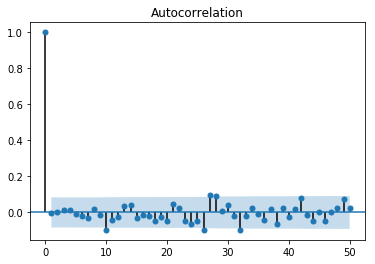

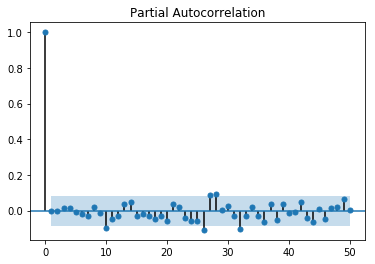

In [198]:
# plot acf and pacf
print(plot_acf(ar7_no_ma.resid, lags=50)) # small spikes and patterns show model has captured variance?
print(plot_pacf(ar7_no_ma.resid, lags=50))

In [199]:
dfw = train_df.diff_weight.astype('float')

dfWeight = train_df.Weight.astype('float')

In [200]:
type(ar7_no_ma.predict())

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


numpy.ndarray

In [201]:
#diff_weight

# plot actual vs. predicted
# plt.plot(diff_weight,label='actual')
# ar7_no_ma.predict(start=len(diff_weight)//2,end=len(diff_weight)-5).plot(label='reconstruction') # this can't forecast future!!!
# plt.legend()
# plt.title("AR7 (no MA): Comparing actual to reconstruction");

In [202]:
train_df.columns

Index(['Steps', 'Distance', 'Calories_Burned', 'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active',
       ...
       'z', 'diff_weight_lag2', 'diff_weight_lag3', 'diff_weight_lag4',
       'diff_weight_lag5', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5'],
      dtype='object', length=102)

In [203]:
train_df[['diff_weight','diff_weight_MA_1','diff_weight_lag1', 'diff_weight_lag2',
        'diff_weight_lag3', 'diff_weight_lag4', 'diff_weight_lag5', 'diff_weight_weekly_lag']]

,diff_weight,diff_weight_MA_1,diff_weight_lag1,diff_weight_lag2,diff_weight_lag3,diff_weight_lag4,diff_weight_lag5,diff_weight_weekly_lag
Date,,,,,,,,
2016-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-20,-0.316667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-21,-0.316667,NaN,-0.316667,NaN,NaN,NaN,NaN,NaN
2016-12-22,-0.316667,-0.316667,-0.316667,-0.316667,NaN,NaN,NaN,NaN
2016-12-23,-0.316667,-0.316667,-0.316667,-0.316667,-0.316667,NaN,NaN,NaN
2016-12-24,-0.316667,-0.316667,-0.316667,-0.316667,-0.316667,-0.316667,NaN,NaN


In [241]:
## RUNNING ON MEAL SPECIFIC MACROS

X = train_df.loc[:, ['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner','diff_weight_lag1', 'diff_weight_lag2',
        'diff_weight_lag3', 'diff_weight_lag4', 'diff_weight_lag5', 'diff_weight_weekly_lag']]


X = X.dropna()
y = train_df.loc[X.index, 'diff_weight']
X = X

In [242]:
X

,Steps,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Calories_Breakfast,Saturated_Fat_Breakfast,Cholesterol_Breakfast,Polyunsaturated_Fat_Breakfast,Monounsaturated_Fat_Breakfast,...,Sodium_(mg)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner,diff_weight_lag1,diff_weight_lag2,diff_weight_lag3,diff_weight_lag4,diff_weight_lag5,diff_weight_weekly_lag
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-27,6378.0,848.0,168.0,1.000000,16.000000,289.400000,3.500000,35.000000,1.000000,2.500000,...,2508.000000,57.000000,1.000000,25.000000,-0.650000,-0.316667,-0.316667,-0.316667,-0.316667,-0.316667
2016-12-28,9507.0,699.0,262.0,5.000000,14.000000,489.400000,8.000000,39.900000,1.000000,2.500000,...,1801.300000,41.400000,5.100000,36.800000,-0.650000,-0.650000,-0.316667,-0.316667,-0.316667,-0.316667
2016-12-29,6472.0,793.0,141.0,11.000000,35.000000,369.400000,6.500000,55.000000,1.000000,2.500000,...,882.441558,50.418182,6.942857,47.597403,1.600000,-0.650000,-0.650000,-0.316667,-0.316667,-0.316667
2016-12-30,2989.0,781.0,120.0,8.977528,16.202247,374.499107,5.857143,103.657143,1.047321,2.433929,...,960.000000,78.000000,9.191071,32.000000,1.100000,1.600000,-0.650000,-0.650000,-0.316667,-0.316667
2016-12-31,784.0,987.0,45.0,13.404494,23.292135,754.400000,9.700000,450.400000,2.400000,3.000000,...,1114.300000,59.961765,9.650000,42.591176,1.100000,1.100000,1.600000,-0.650000,-0.650000,-0.316667
2017-01-01,137.0,1431.0,9.0,12.157303,24.078652,503.229231,8.149231,308.261538,1.404615,3.420000,...,1565.016279,71.923256,10.444186,45.627907,-0.120000,1.100000,1.100000,1.600000,-0.650000,-0.316667
2017-01-02,4791.0,829.0,131.0,9.348315,19.000000,351.236207,5.197414,126.706034,1.255172,2.800862,...,1108.320290,68.001449,6.204348,51.178261,-0.120000,-0.120000,1.100000,1.100000,1.600000,-0.650000
2017-01-03,5224.0,840.0,174.0,8.636364,17.397727,289.400000,3.500000,35.000000,1.000000,2.500000,...,496.800000,155.200000,2.800000,99.600000,-0.120000,-0.120000,-0.120000,1.100000,1.100000,-0.650000
2017-01-04,7864.0,710.0,205.0,16.000000,19.000000,250.000000,3.500000,35.000000,1.000000,2.500000,...,1340.600000,65.700000,9.100000,19.100000,-0.120000,-0.120000,-0.120000,-0.120000,1.100000,1.600000


In [243]:
y

Date
2016-12-27   -0.650000
2016-12-28    1.600000
2016-12-29    1.100000
2016-12-30    1.100000
2016-12-31   -0.120000
2017-01-01   -0.120000
2017-01-02   -0.120000
2017-01-03   -0.120000
2017-01-04   -0.120000
2017-01-05   -0.560000
2017-01-06   -0.560000
2017-01-07   -0.560000
2017-01-08   -0.560000
2017-01-09   -0.560000
2017-01-10   -0.200000
2017-01-11   -0.200000
2017-01-12    0.733333
2017-01-13    0.733333
2017-01-14    0.733333
2017-01-15    0.733333
2017-01-16    0.733333
2017-01-17    0.733333
2017-01-18   -0.500000
2017-01-19   -0.500000
2017-01-20   -1.600000
2017-01-21   -0.100000
2017-01-22   -0.100000
2017-01-23   -0.600000
2017-01-24    1.400000
2017-01-25   -1.600000
                ...   
2018-05-30   -0.400000
2018-05-31   -1.800000
2018-06-01   -0.600000
2018-06-02   -0.200000
2018-06-03    1.800000
2018-06-04   -0.600000
2018-06-05   -0.600000
2018-06-06    1.200000
2018-06-07   -2.000000
2018-06-08    0.200000
2018-06-09    0.000000
2018-06-10    1.400000
2018-0

In [244]:
train_df[['diff_weight_MA_1','diff_weight_lag1', 'diff_weight_lag2',
        'diff_weight_lag3', 'diff_weight_lag4', 'diff_weight_lag5', 'diff_weight_weekly_lag']]

,diff_weight_MA_1,diff_weight_lag1,diff_weight_lag2,diff_weight_lag3,diff_weight_lag4,diff_weight_lag5,diff_weight_weekly_lag
Date,,,,,,,
2016-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-21,NaN,-0.316667,NaN,NaN,NaN,NaN,NaN
2016-12-22,-0.316667,-0.316667,-0.316667,NaN,NaN,NaN,NaN
2016-12-23,-0.316667,-0.316667,-0.316667,-0.316667,NaN,NaN,NaN
2016-12-24,-0.316667,-0.316667,-0.316667,-0.316667,-0.316667,NaN,NaN


In [245]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import math
tscv = TimeSeriesSplit(n_splits=6)
print(tscv)  

models = [('Linear Regresion', LinearRegression),
          ('SVR', SVR),
          ('Decision Tree', DecisionTreeRegressor),
          ('Random Forest', RandomForestRegressor),
          ('Gradient Boosted Trees', GradientBoostingRegressor)
         ]

param_choices = [
    {},
    {
        'C': np.linspace(0.1,100,101)
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params)
    val_r2_scores = []
    val_adj_r2_scores = []
    final_r2_scores = []
    final_adj_r2_scores = []
    val_rmse_scores = []
    final_rmse_scores = []
    for train_index, test_index in tscv.split(X):
        nested_train_length = math.ceil(0.75 * len(train_index))
        X_train, X_final_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_final_test = y.iloc[train_index].values.reshape(-1,), y.iloc[test_index].values.reshape(-1,)
        X_nested_train = X_train[:nested_train_length]
        X_nested_valtest = X_train[nested_train_length:]
        y_nested_train = y_train[:nested_train_length]
        y_nested_valtest = y_train[nested_train_length:]
        grid.fit(X_nested_train, y_nested_train)
        y_valtest_pred = grid.predict(X_nested_valtest)
        val_r2_score = grid.score(X_nested_valtest,y_nested_valtest)
        val_adj_r2_score = 1 - (1-grid.score(X_nested_valtest, y_nested_valtest))*(len(y_nested_valtest)-1)/(len(y_nested_valtest)-X_nested_valtest.shape[1]-1)
        val_mse_score = mean_squared_error(y_nested_valtest, y_valtest_pred)
        val_rmse_score = np.sqrt(val_mse_score)
        val_r2_scores.append(np.round(val_r2_score,4))
        val_adj_r2_scores.append(np.round(val_adj_r2_score,4))
        val_rmse_scores.append(np.round(val_rmse_score,4))
        avg_val_mse_score = np.round(np.mean(val_rmse_scores),4)
        avg_val_r2_score = np.round(np.mean(val_r2_scores),4)
        avg_val_adj_r2_score = np.round(np.mean(val_adj_r2_scores),4)
        
        y_finaltest_pred = grid.predict(X_final_test)
        final_r2_score = grid.score(X_final_test,y_final_test)
        final_adj_r2_score = 1 - (1-grid.score(X_final_test, y_final_test))*(len(y_final_test)-1)/(len(y_final_test)-X_final_test.shape[1]-1)
        final_mse_score = mean_squared_error(y_final_test,y_finaltest_pred)
        final_rmse_score = np.sqrt(final_mse_score)
        final_r2_scores.append(np.round(final_r2_score,4))
        final_adj_r2_scores.append(np.round(final_adj_r2_score,4))
        final_rmse_scores.append(np.round(final_rmse_score,4))
        avg_final_mse_score = np.round(np.mean(final_rmse_scores),4)
        avg_final_r2_score = np.round(np.mean(final_r2_scores),4)
        avg_final_adj_r2_score = np.round(np.mean(final_adj_r2_scores),4)
        
        s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
        
        grids[name] = grid
        
    print(f'Model name: {name}')
    print(f'Val RMSE scores: {val_rmse_scores}')
    print(f'Val R^2 scores: {val_r2_scores}')
    print(f'Val Adj. R^2 scores: {val_adj_r2_scores}')
    print(f'{name} Val RMSE: {avg_val_mse_score}')
    print(f'{name} Val R^2: {avg_val_r2_score}')
    print(f'{name} Val Adj. R^2: {avg_val_adj_r2_score}')
    print(f'Final RMSE scores: {final_rmse_scores}')
    print(f'Final R^2 scores: {final_r2_scores}')
    print(f'Final Adj. R^2 scores: {final_adj_r2_scores}')
    print(f'{name} Final RMSE: {avg_final_mse_score}')
    print(f'{name} Final R^2: {avg_final_r2_score}')
    print(f'{name} Final Adj. R^2: {avg_final_adj_r2_score}')
    print('\n')

TimeSeriesSplit(max_train_size=None, n_splits=6)
Model name: Linear Regresion
Val RMSE scores: [1.9493, 1.8654, 1.0966, 1.2163, 1.0511, 1.0564]
Val R^2 scores: [-7.4654, -0.7993, -1.195, 0.1939, 0.1407, -0.0897]
Val Adj. R^2 scores: [8.311, 23.7909, -6.489, -0.7241, -0.4884, -0.6854]
Linear Regresion Val RMSE: 1.3725
Linear Regresion Val R^2: -1.5358
Linear Regresion Val Adj. R^2: 3.9525
Final RMSE scores: [5.5102, 2.1454, 1.1817, 1.136, 1.0895, 1.375]
Final R^2 scores: [-14.0996, -5.8578, 0.2391, -0.0067, -0.3579, 0.0965]
Final Adj. R^2 scores: [-31.2964, -13.6682, -0.6275, -1.1533, -1.9044, -0.9326]
Linear Regresion Final RMSE: 2.073
Linear Regresion Final R^2: -3.3311
Linear Regresion Final Adj. R^2: -8.2637


Model name: SVR
Val RMSE scores: [0.6822, 1.3971, 0.7407, 1.3527, 1.1125, 1.0024]
Val R^2 scores: [-0.0368, -0.0093, -0.0015, 0.003, 0.0375, 0.0188]
Val Adj. R^2 scores: [1.8954, 13.7842, -2.417, -1.1325, -0.6672, -0.5176]
SVR Val RMSE: 1.0479
SVR Val R^2: 0.0019
SVR Val Adj. 

In [246]:
models = [
          ('Random Forest', RandomForestRegressor)
         ]

param_choices = [
    
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    grid.fit(X, y)
    s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
    print(s)
    grids[name] = grid
    

rf_by_meal = grid.best_estimator_ 

rf_by_meal.fit(X,y)

Random Forest: best score: -1.1788814563337704, best estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [247]:
importances = list(zip(rf_by_meal.feature_importances_, X.columns))
importances.sort(reverse=True)
importances

[(0.1658911180462001, 'diff_weight_lag2'),
 (0.11984038918640373, 'Trans_Fat_Lunch'),
 (0.08407498579022699, 'diff_weight_lag1'),
 (0.047130349621954684, 'diff_weight_lag4'),
 (0.040257633701045584, 'Trans_Fat_Dinner'),
 (0.03401419364976063, 'diff_weight_lag5'),
 (0.03349505340799494, 'Minutes_Fairly_Active'),
 (0.03337655757149706, 'Sugar_Lunch'),
 (0.029187804415585727, 'diff_weight_lag3'),
 (0.0252406288388376, 'Sugar_Breakfast'),
 (0.023135956364214443, 'Sugar_Dinner'),
 (0.021913328221223695, 'Minutes_Very_Active'),
 (0.018240012034286525, 'diff_weight_weekly_lag'),
 (0.018204320217123923, 'Minutes_Sedentary'),
 (0.017728727006843956, 'Steps'),
 (0.017221051277483714, 'Saturated_Fat_Lunch'),
 (0.016849464190988685, 'Polyunsaturated_Fat_Dinner'),
 (0.016274475207800666, 'Cholesterol_Dinner'),
 (0.016068230264611173, 'Monounsaturated_Fat_Dinner'),
 (0.015958588827838495, 'Cholesterol_Breakfast'),
 (0.015939353323804906, 'Protein_(g)_Lunch'),
 (0.015368173084021658, 'Protein_(g)_Bre

In [248]:
rf_diff_weight_predictions = rf_by_meal.predict(X)

print(rf_diff_weight_predictions)
print(len(rf_diff_weight_predictions))

[-1.33794299e-01  2.81568706e-02  1.80687804e-01  2.69143769e-01
  3.36768234e-01  4.74503878e-03  1.92591983e-01 -1.19498655e-01
 -7.84317491e-02 -1.61510309e-01 -2.59337485e-01  1.13692164e-01
  2.35029122e-01 -2.96662725e-04 -1.35965881e-01 -1.40495184e-01
  3.13725052e-02  2.10455638e-01  3.27046720e-01  4.49907589e-01
  1.95433957e-01 -1.25602797e-01 -4.88110792e-01 -4.62355213e-01
 -6.99007705e-01  3.75389489e-01  4.40590388e-01 -3.60233973e-02
 -8.53709955e-03 -3.41043624e-01  2.04157815e-01 -7.37999744e-01
 -6.56620195e-01  1.12279397e+00  1.03264007e+00 -8.58844959e-01
 -1.00780850e+00 -3.83575177e-01  2.91813479e-02  3.36359536e-01
  6.12771743e-01  5.19929319e-01 -1.49333597e-01 -5.12472997e-01
 -3.42758742e-01 -2.54788704e-01 -7.65767112e-02  3.66996451e-01
  4.00246135e-01  4.82707925e-02 -1.29456305e-01 -2.61370765e-01
 -5.23139431e-02  1.67892420e-01  1.73727645e-01 -2.93109717e-02
 -6.30367372e-02  1.04103320e-02 -4.12555891e-01 -1.35833008e-01
 -3.69820285e-03  1.50386

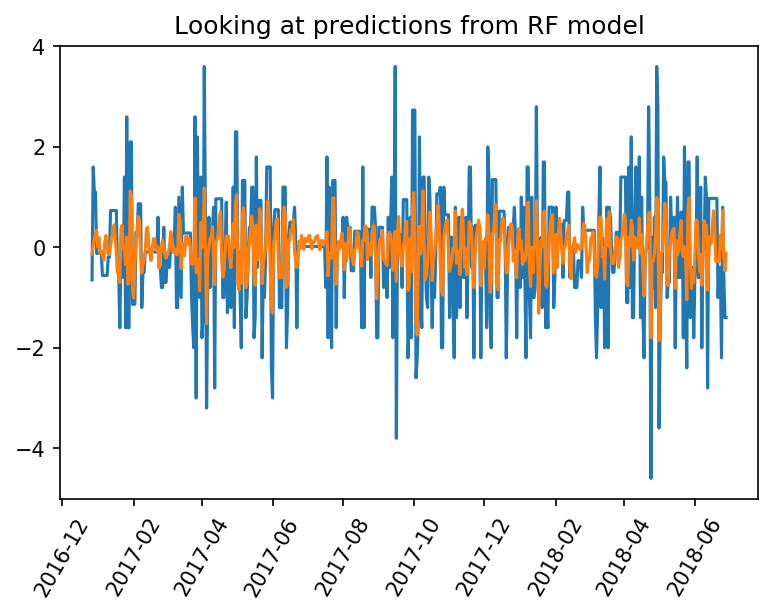

In [249]:
plt.figure(dpi=150)
plt.plot(X.index, y)
plt.plot(X.index, rf_diff_weight_predictions)
plt.title("Looking at predictions from RF model")
plt.xticks(rotation=60);

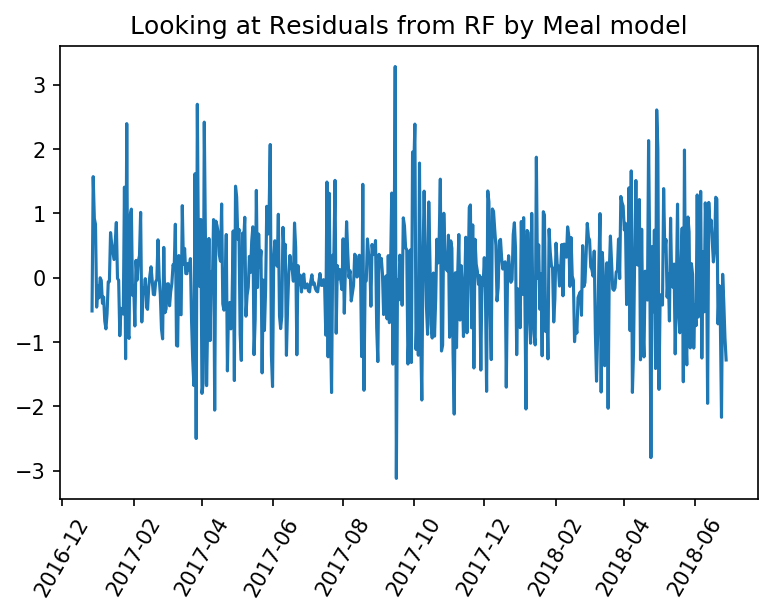

In [250]:
plt.figure(dpi=150)
plt.plot(X.index, y-rf_diff_weight_predictions)
plt.title("Looking at Residuals from RF by Meal model")
plt.xticks(rotation=60);

In [251]:
rf_predictions_diff_cumsum = rf_diff_weight_predictions.cumsum()
print(rf_predictions_diff_cumsum)

[-1.33794299e-01 -1.05637429e-01  7.50503751e-02  3.44194144e-01
  6.80962378e-01  6.85707417e-01  8.78299400e-01  7.58800745e-01
  6.80368996e-01  5.18858687e-01  2.59521202e-01  3.73213365e-01
  6.08242488e-01  6.07945825e-01  4.71979944e-01  3.31484760e-01
  3.62857265e-01  5.73312903e-01  9.00359622e-01  1.35026721e+00
  1.54570117e+00  1.42009837e+00  9.31987579e-01  4.69632366e-01
 -2.29375340e-01  1.46014149e-01  5.86604537e-01  5.50581140e-01
  5.42044041e-01  2.01000416e-01  4.05158231e-01 -3.32841513e-01
 -9.89461707e-01  1.33332266e-01  1.16597234e+00  3.07127381e-01
 -7.00681124e-01 -1.08425630e+00 -1.05507495e+00 -7.18715416e-01
 -1.05943673e-01  4.13985646e-01  2.64652049e-01 -2.47820948e-01
 -5.90579690e-01 -8.45368394e-01 -9.21945105e-01 -5.54948654e-01
 -1.54702519e-01 -1.06431726e-01 -2.35888031e-01 -4.97258797e-01
 -5.49572740e-01 -3.81680320e-01 -2.07952675e-01 -2.37263647e-01
 -3.00300384e-01 -2.89890052e-01 -7.02445943e-01 -8.38278950e-01
 -8.41977153e-01 -6.91590

In [252]:
dec_26_weight = 184.25

real_weight_predictions_rf = pd.Series(train_df.Weight[11] + rf_predictions_diff_cumsum, index=train_df.Weight.index[11:])

real_weight_predictions_rf[0:50]

Date
2016-12-27    183.466206
2016-12-28    183.494363
2016-12-29    183.675050
2016-12-30    183.944194
2016-12-31    184.280962
2017-01-01    184.285707
2017-01-02    184.478299
2017-01-03    184.358801
2017-01-04    184.280369
2017-01-05    184.118859
2017-01-06    183.859521
2017-01-07    183.973213
2017-01-08    184.208242
2017-01-09    184.207946
2017-01-10    184.071980
2017-01-11    183.931485
2017-01-12    183.962857
2017-01-13    184.173313
2017-01-14    184.500360
2017-01-15    184.950267
2017-01-16    185.145701
2017-01-17    185.020098
2017-01-18    184.531988
2017-01-19    184.069632
2017-01-20    183.370625
2017-01-21    183.746014
2017-01-22    184.186605
2017-01-23    184.150581
2017-01-24    184.142044
2017-01-25    183.801000
2017-01-26    184.005158
2017-01-27    183.267158
2017-01-28    182.610538
2017-01-29    183.733332
2017-01-30    184.765972
2017-01-31    183.907127
2017-02-01    182.899319
2017-02-02    182.515744
2017-02-03    182.544925
2017-02-04    182.88

In [253]:
train_df.Weight[:50]

Date
2016-12-16           NaN
2016-12-17           NaN
2016-12-18           NaN
2016-12-19    186.800000
2016-12-20    186.483333
2016-12-21    186.166667
2016-12-22    185.850000
2016-12-23    185.533333
2016-12-24    185.216667
2016-12-25    184.900000
2016-12-26    184.250000
2016-12-27    183.600000
2016-12-28    185.200000
2016-12-29    186.300000
2016-12-30    187.400000
2016-12-31    187.280000
2017-01-01    187.160000
2017-01-02    187.040000
2017-01-03    186.920000
2017-01-04    186.800000
2017-01-05    186.240000
2017-01-06    185.680000
2017-01-07    185.120000
2017-01-08    184.560000
2017-01-09    184.000000
2017-01-10    183.800000
2017-01-11    183.600000
2017-01-12    184.333333
2017-01-13    185.066667
2017-01-14    185.800000
2017-01-15    186.533333
2017-01-16    187.266667
2017-01-17    188.000000
2017-01-18    187.500000
2017-01-19    187.000000
2017-01-20    185.400000
2017-01-21    185.300000
2017-01-22    185.200000
2017-01-23    184.600000
2017-01-24    186.00

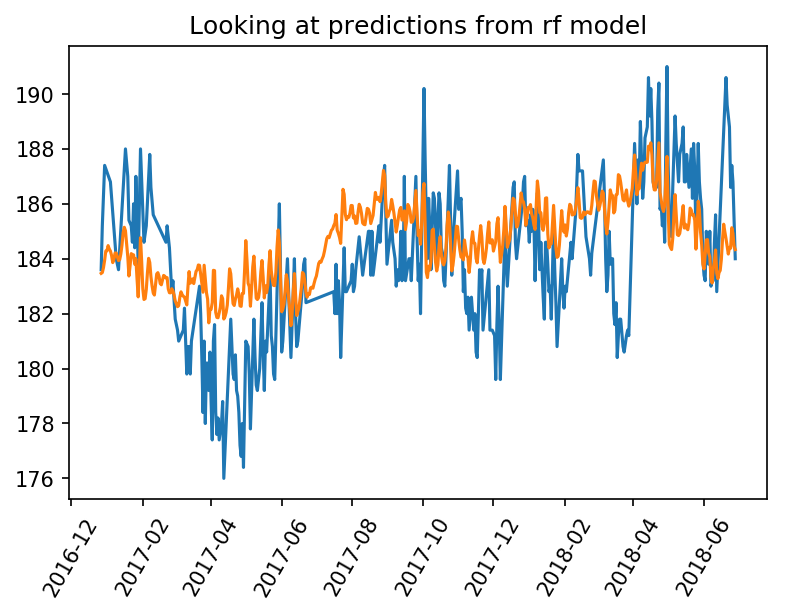

In [254]:
plt.figure(dpi=150)
plt.plot(X.index, train_df.Weight[11:])
plt.plot(X.index, real_weight_predictions_rf)
plt.title("Looking at predictions from rf model")
plt.xticks(rotation=60);

In [255]:
train_df['Predicted_weights'] = np.nan

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [256]:
train_df['Predicted_weights'][11:] = train_df.Weight[11:].values + rf_diff_weight_predictions

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


(175, 195)

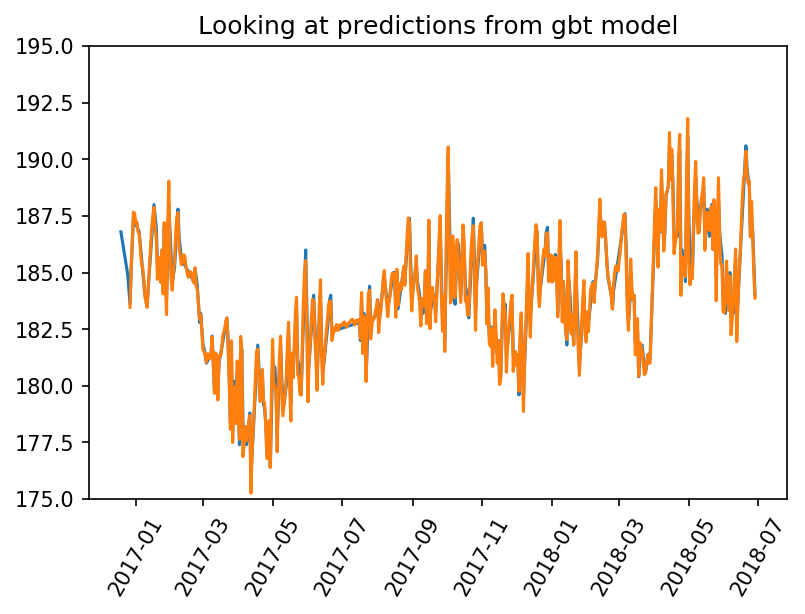

In [257]:
plt.figure(dpi=150)
plt.plot(train_df.index, train_df.Weight)
plt.plot(train_df.index, train_df.Predicted_weights)
plt.title("Looking at predictions from gbt model")
plt.xticks(rotation=60);
plt.ylim(175, 195)

In [ ]:
# # fit better sarima
# import statsmodels.api as sm

# exog_vars = train_df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
#        'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
#        'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
#        'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
#        'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
#        'Sodium_(mg)_Breakfast',
#        'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
#        'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
#        'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
#        'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
#        'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
#        'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
#        'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
#        'Sugar_Dinner', 'Protein_(g)_Dinner']][:-3]


# sarima1 = sm.tsa.statespace.SARIMAX(dfWeight[:-3], order=(0,0,0), seasonal_order=(1,1,1,7), exog=exog_vars, trend='c').fit()
# sarima1.summary()

In [ ]:
train_df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
               'Calories','Saturated Fat', 'Polyunsaturated Fat',
               'Monounsaturated Fat','Trans Fat', 'Cholesterol',
               'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Sodium (mg)',
               'Carbohydrates (g)', 'Sugar', 'Protein (g)']].corr()

## SHUFFLE RANDOM FOREST FEATURES TO VALIDATE -- ASK DAMIEN

In [760]:
train_df.reset_index(inplace=True)

train_df.dropna(subset=['Weight', 'Predicted_weights_GBT'], inplace=True)

train_df.to_csv('Data/Kojak_train_weights.csv')

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [757]:
# train_df.set_index('Date', inplace=True)
# train_df.drop('index', axis=1 ,inplace=True)

train_df.head()

,index,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,...,diff_weight_lag4,diff_weight_lag5,lag1,lag2,lag3,lag4,lag5,Predicted_weights,Predicted_weights_GBT,Predicted_weights_GBT_meal
0,0,2016-12-27,6378.0,4.77712,2633.0,3.00000,9.000000,923.0,848.0,168.0,...,-0.316667,-0.316667,-0.65,-0.316667,-0.316667,-0.316667,-0.316667,183.241919,183.293731,183.267932
1,1,2016-12-28,9507.0,7.58109,3267.0,9.00000,27.000000,1464.0,699.0,262.0,...,-0.316667,-0.316667,-0.65,-0.650000,-0.316667,-0.316667,-0.316667,184.841919,184.888361,184.991111
2,2,2016-12-29,6472.0,4.84752,2775.0,6.00000,18.000000,1054.0,793.0,141.0,...,-0.316667,-0.316667,1.60,-0.650000,-0.650000,-0.316667,-0.316667,186.937425,186.770869,186.827238
3,3,2016-12-30,2989.0,2.23876,2384.0,6.52809,19.629213,495.0,781.0,120.0,...,-0.650000,-0.316667,1.10,1.600000,-0.650000,-0.650000,-0.316667,188.072987,187.872319,187.966414
4,4,2016-12-31,784.0,0.58721,2155.0,1.00000,3.000000,172.0,987.0,45.0,...,-0.650000,-0.650000,1.10,1.100000,1.600000,-0.650000,-0.650000,187.925628,187.745249,187.803817


In [758]:
dfWeight = train_df.Weight

In [263]:
# fit better sarima
# import statsmodels.api as sm

# exog_vars = train_df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
#        'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
#        'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
#        'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
#        'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
#        'Sodium_(mg)_Breakfast',
#        'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
#        'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
#        'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
#        'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
#        'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
#        'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
#        'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
#        'Sugar_Dinner', 'Protein_(g)_Dinner','diff_weight_lag1', 'diff_weight_weekly_lag']]


# sarima1 = sm.tsa.statespace.SARIMAX(dfWeight, order=(0,0,0), seasonal_order=(1,1,1,7), exog=exog_vars, trend='c').fit()
# sarima1.summary()

In [258]:
HOLDOUT_X = holdout_df.loc[:, ['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner','diff_weight_lag1', 'diff_weight_lag2',
        'diff_weight_lag3', 'diff_weight_lag4', 'diff_weight_lag5', 'diff_weight_weekly_lag']]

HOLDOUT_X = HOLDOUT_X.dropna()
HOLDOUT_y = holdout_df.loc[HOLDOUT_X.index, 'diff_weight']

models = [rf_by_meal]
names = ['RF Macros by Day']

print(f'Holdout TEST Scores')

for model, name in zip(models, names):

    HOLDOUT_y_pred_meal = model.predict(HOLDOUT_X)
    holdout_r2_score = np.round(model.score(HOLDOUT_X,HOLDOUT_y),4)
    holdout_adj_r2_score = np.round(1 - (1-model.score(HOLDOUT_X, HOLDOUT_y))*(len(HOLDOUT_y)-1)/(len(HOLDOUT_y)-HOLDOUT_X.shape[1]-1),4)
    holdout_mse_score = mean_squared_error(HOLDOUT_y,HOLDOUT_y_pred_day)
    holdout_rmse_score = np.round(np.sqrt(holdout_mse_score),4)

    print(f'{name} HOLDOUT SET Final RMSE: {holdout_rmse_score}')
    print(f'{name} HOLDOUT SET Final R^2: {holdout_r2_score}')
    print(f'{name} HOLDOUT SET Final Adj. R^2: {holdout_adj_r2_score}')

Holdout TEST Scores
RF Macros by Day HOLDOUT SET Final RMSE: 1.1158
RF Macros by Day HOLDOUT SET Final R^2: 0.119
RF Macros by Day HOLDOUT SET Final Adj. R^2: -1.8879


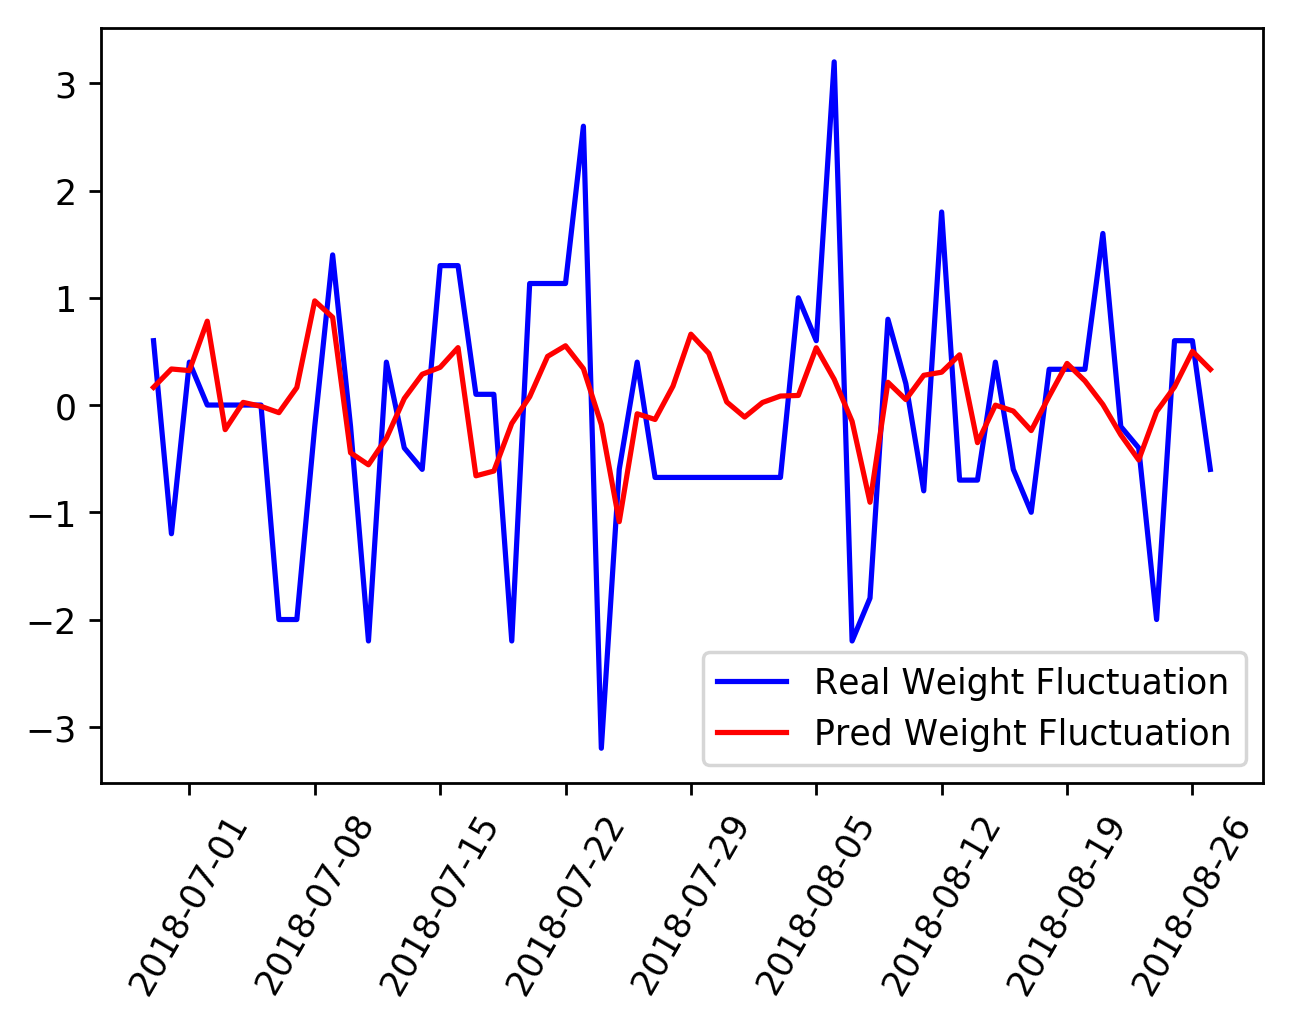

In [259]:
plt.figure(dpi=250)
plt.plot(HOLDOUT_y,color='blue',label='Real Weight Fluctuation')
hold_y_pred = pd.Series(HOLDOUT_y_pred_meal, index=HOLDOUT_y.index)
plt.plot(hold_y_pred, color='red',label='Pred Weight Fluctuation')
plt.xticks(rotation=60)
plt.legend()

In [260]:
final_weight_predictions_cumsum = HOLDOUT_y_pred_meal.cumsum()

In [794]:
train_df.Weight

0      183.600000
1      185.200000
2      186.300000
3      187.400000
4      187.280000
5      187.160000
6      187.040000
7      186.920000
8      186.800000
9      186.240000
10     185.680000
11     185.120000
12     184.560000
13     184.000000
14     183.800000
15     183.600000
16     184.333333
17     185.066667
18     185.800000
19     186.533333
20     187.266667
21     188.000000
22     187.500000
23     187.000000
24     185.400000
25     185.300000
26     185.200000
27     184.600000
28     186.000000
29     184.400000
          ...    
531    185.600000
532    182.800000
533    183.775000
534    184.750000
535    185.725000
536    186.700000
537    187.675000
538    188.650000
539    189.625000
540    190.600000
541    189.600000
542    189.200000
543    188.800000
544    186.600000
545    187.400000
546    186.800000
547    185.400000
548    184.000000
549    184.600000
550    183.400000
551    183.800000
552    183.800000
553    183.800000
554    183.800000
555    183

In [261]:
final_weight_predictions = pd.Series(holdout_df.Weight[0] + final_weight_predictions_cumsum, index=holdout_df.Weight.index)

# final_weight_predictions = final_weight_predictions.shift(-1)

final_weight_predictions

Date
2018-06-29    184.765134
2018-06-30    185.101303
2018-07-01    185.422728
2018-07-02    186.204698
2018-07-03    185.975143
2018-07-04    186.000077
2018-07-05    185.987900
2018-07-06    185.916836
2018-07-07    186.079915
2018-07-08    187.051268
2018-07-09    187.869258
2018-07-10    187.424151
2018-07-11    186.867046
2018-07-12    186.557309
2018-07-13    186.618433
2018-07-14    186.905485
2018-07-15    187.256814
2018-07-16    187.792190
2018-07-17    187.132236
2018-07-18    186.516729
2018-07-19    186.344966
2018-07-20    186.422407
2018-07-21    186.875998
2018-07-22    187.428733
2018-07-23    187.767899
2018-07-24    187.585601
2018-07-25    186.498128
2018-07-26    186.416733
2018-07-27    186.282226
2018-07-28    186.458224
2018-07-29    187.118980
2018-07-30    187.601030
2018-07-31    187.629770
2018-08-01    187.517655
2018-08-02    187.541618
2018-08-03    187.625605
2018-08-04    187.714912
2018-08-05    188.249247
2018-08-06    188.489034
2018-08-07    188.33

In [262]:
holdout_df.Weight

Date
2018-06-29    184.600000
2018-06-30    183.400000
2018-07-01    183.800000
2018-07-02    183.800000
2018-07-03    183.800000
2018-07-04    183.800000
2018-07-05    183.800000
2018-07-06    181.800000
2018-07-07    179.800000
2018-07-08    179.600000
2018-07-09    181.000000
2018-07-10    180.800000
2018-07-11    178.600000
2018-07-12    179.000000
2018-07-13    178.600000
2018-07-14    178.000000
2018-07-15    179.300000
2018-07-16    180.600000
2018-07-17    180.700000
2018-07-18    180.800000
2018-07-19    178.600000
2018-07-20    179.733333
2018-07-21    180.866667
2018-07-22    182.000000
2018-07-23    184.600000
2018-07-24    181.400000
2018-07-25    180.800000
2018-07-26    181.200000
2018-07-27    180.525000
2018-07-28    179.850000
2018-07-29    179.175000
2018-07-30    178.500000
2018-07-31    177.825000
2018-08-01    177.150000
2018-08-02    176.475000
2018-08-03    175.800000
2018-08-04    176.800000
2018-08-05    177.400000
2018-08-06    180.600000
2018-08-07    178.40

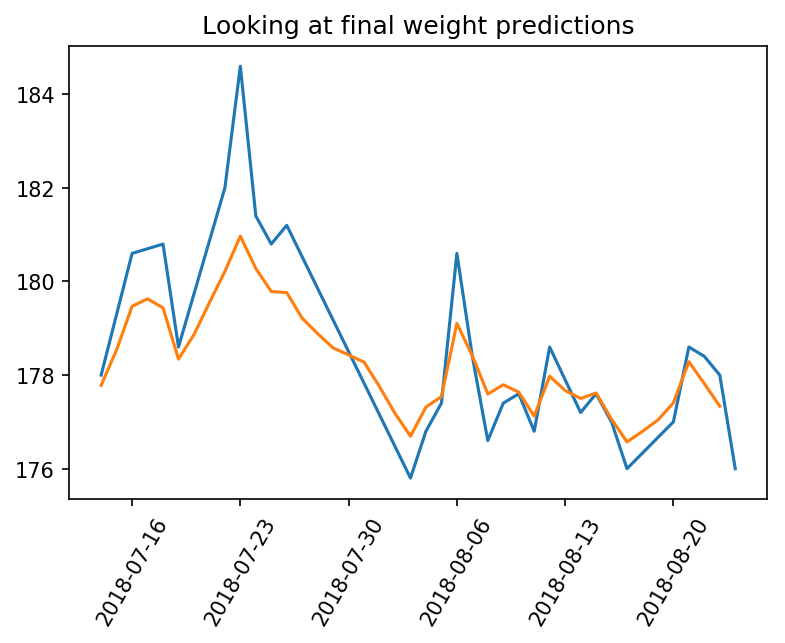

In [797]:
plt.figure(dpi=150)
plt.plot(holdout_df.index[:-3], holdout_df.Weight[:-3])
plt.plot(holdout_df.index[:-3], final_weight_predictions)
plt.title("Looking at final weight predictions")
plt.xticks(rotation=60);

In [799]:
holdout_df['Final_predicted_weights'] = np.nan

holdout_df['Final_predicted_weights'] = holdout_df.Weight.values + HOLDOUT_y_pred_meal

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

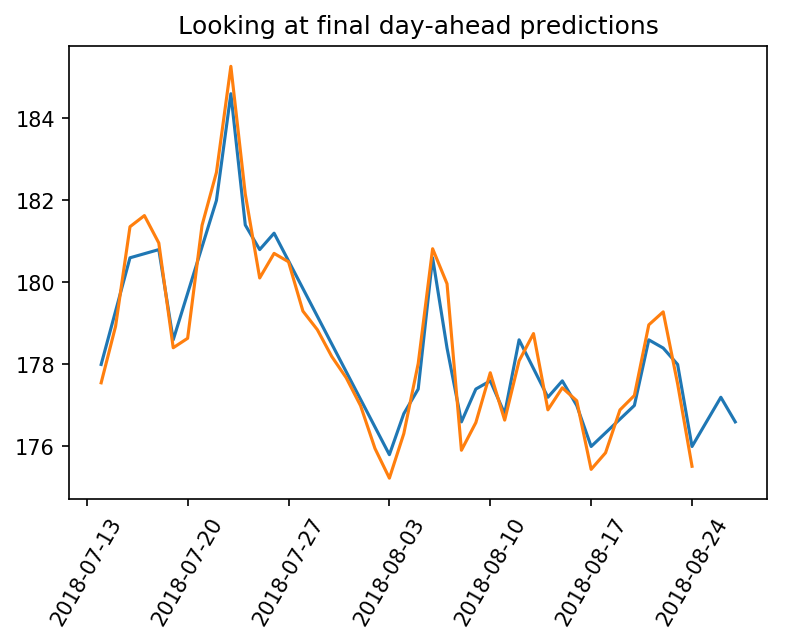

In [800]:
plt.figure(dpi=150)
plt.plot(holdout_df.index, holdout_df.Weight)
plt.plot(holdout_df.index, holdout_df.Final_predicted_weights)
plt.title("Looking at final day-ahead predictions")
plt.xticks(rotation=60);

In [ ]:
def _forecast_error(self, steps=1):
    sigma2 = self.sigma2
    ma_rep = arma2ma(np.r_[1, -self.arparams],
                     np.r_[1, self.maparams], lags=steps)

    fcasterr = np.sqrt(sigma2 * np.cumsum(ma_rep**2))
    return fcasterr

def _forecast_conf_int(self, forecast, fcasterr, alpha):
    const = norm.ppf(1 - alpha / 2.)
    conf_int = np.c_[forecast - const * fcasterr,
                     forecast + const * fcasterr]

    return conf_int

In [803]:
import numpy as np
import scipy.stats

def mean_confidence_interval(forecast, confidence=0.95):
    #a = 1.0 * np.array(data)
    n = len(forecast)
    m, se = np.mean(forecast), scipy.stats.sem(forecast)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [804]:
mean_confidence_interval(holdout_df.Final_predicted_weights)

(178.56034932321276, nan, nan)

In [ ]:
def forecast_conf_int(forecast, fcasterr, alpha):
    const = norm.ppf(1 - alpha / 2.)
    conf_int = np.c_[forecast - const * fcasterr,
                        forecast + const * fcasterr]